In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import os
import sys
import bilby
import seaborn as sns
import pandas as pd
%matplotlib notebook
import matplotlib as mpl

In [2]:
telescope='MeerKAT'
#telescope='Parkes'

if telescope=='MeerKAT':
    os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/timFiles')
    Total_chn=29
    residuals_32p_Entire_data = np.genfromtxt('PostRes_32pulint_Entire_NoBadObs_ChnRmd_all.txt')
    residuals_32p_SysNoise_Entire_data = np.genfromtxt('PostRes_32pulint_Entire_NoBadObs_ChnRmd_SysNoise.txt')

if telescope=='Parkes':
    os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_UWL_01Aug_22/Processed/phase_shifted/timfiles')
    Total_chn=35
    residuals_32p_Entire_data = np.genfromtxt('PostRes_64pulint_Entire_SelChn_all.txt')
    residuals_32p_SysNoise_Entire_data = np.genfromtxt('PostRes_64pulint_Entire_SelChn_all_SysNoise.txt')

residuals_32p_Entire_data = residuals_32p_Entire_data.reshape((-1,Total_chn,4)) 

residuals_32p_Entire=residuals_32p_Entire_data[:,:,2]
Freq_32p_Entire=np.mean(residuals_32p_Entire_data[:,:,1],axis=0)

residuals_32p_SysNoise_Entire_data = residuals_32p_SysNoise_Entire_data.reshape((-1,Total_chn,4))

residuals_32p_SysNoise_Entire=residuals_32p_SysNoise_Entire_data[:,:,2]
Freq_32p_SysNoise_Entire=np.mean(residuals_32p_SysNoise_Entire_data[:,:,1],axis=0)



<IPython.core.display.Javascript object>


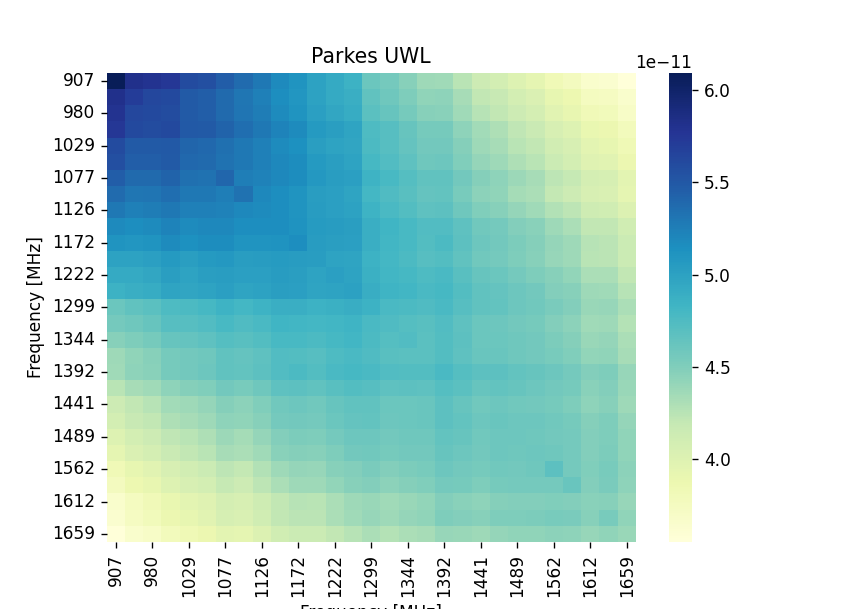

Text(0.5, 1.0, 'Parkes UWL')

In [3]:
Cov_res_32p_Entire=np.cov(residuals_32p_Entire,rowvar=False)
Cov_sysres_32p_Entire=np.cov(residuals_32p_SysNoise_Entire,rowvar=False)

Cov_jitter_32p_Entire=Cov_res_32p_Entire-Cov_sysres_32p_Entire

df=pd.DataFrame(data=Cov_jitter_32p_Entire,
               index=[int(Freq_32p_Entire[i]) for i in range(Freq_32p_Entire.shape[0])],
               columns=[int(Freq_32p_Entire[i]) for i in range(Freq_32p_Entire.shape[0])])
Fig, Ax = plt.subplots(figsize=(7,5))
sns.heatmap(df,ax=Ax,xticklabels=2,cmap='YlGnBu')
Ax.set_xlabel("Frequency [MHz]")
Ax.set_ylabel("Frequency [MHz]")
Ax.set_title('Parkes UWL')

With EFAC set to 1 and different EQUAD for each frequency, the variance due to jitter will be absorbed in EQUAD so, essentially, the frequency dependent EQUAD should match with the variance curve obtained from here.

<IPython.core.display.Javascript object>


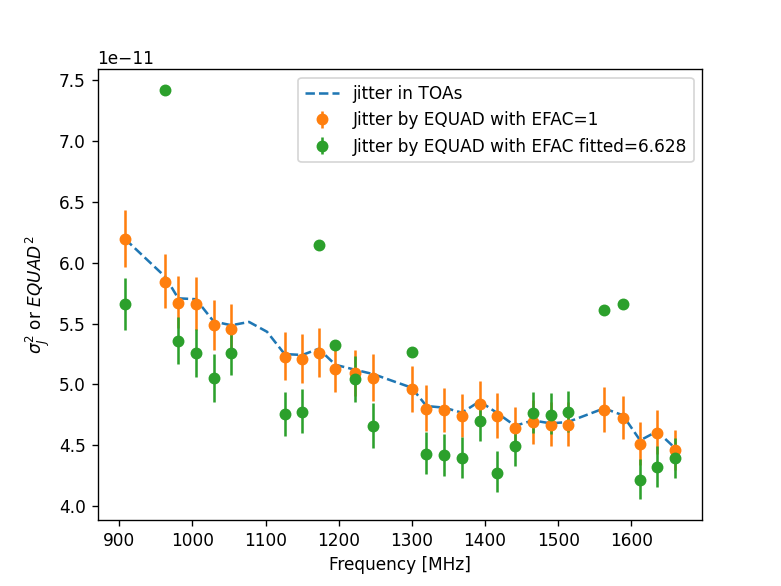

In [71]:
#### EFAC=1 and EQUAD as parameter############################################

[med,low,high]=np.loadtxt('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_enterprise/32p_selChn/median-err.txt')

pars=np.loadtxt('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_enterprise/32p_selChn/pars.txt',dtype=np.unicode_)

indices=[]
for i in range(pars.shape[0]):
    indices.append(int(str(pars[i]).split('_')[1]))
    
med=np.array([(sorted(zip(indices,med))[i])[1] for i in range(len(indices))])
low=np.array([(sorted(zip(indices,low))[i])[1] for i in range(len(indices))])
high=np.array([(sorted(zip(indices,high))[i])[1] for i in range(len(indices))])

# list_removed_chn=[1,15,26]
# list_removed_chn.sort()
# med=np.delete(med,list_removed_chn)
# low=np.delete(low,list_removed_chn)
# high=np.delete(high,list_removed_chn)
Freq_32p_Entire_ent=np.delete(Freq_32p_Entire,[6,7])

sysnoise_for_EFAC=np.delete([(6.628**2)*Cov_sysres_32p_Entire[chn,chn] for chn in range(Cov_sysres_32p_Entire.shape[0])],[6,7])
sysnoise_for_NoEFAC=np.delete([(1**2)*Cov_sysres_32p_Entire[chn,chn] for chn in range(Cov_sysres_32p_Entire.shape[0])],[6,7])

plt.figure()
plt.plot(Freq_32p_Entire,[Cov_res_32p_Entire[chn,chn] for chn in range(Cov_jitter_32p_Entire.shape[0])],'--',label='jitter in TOAs')
#plt.errorbar(Freq_32p_Entire_ent,10**(2*med),yerr=np.array([10**(2*med)-10**(2*(med-low)),10**(2*(med+high))-10**(2*med)]),fmt='o')
plt.errorbar(Freq_32p_Entire_ent,sysnoise_for_NoEFAC+10**(2*med),yerr=np.array([10**(2*med)-10**(2*low),10**(2*high)-10**(2*med)]),fmt='o',label='Jitter by EQUAD with EFAC=1')
############################################################################

############## EFAC and EQUAD both as parameters############################3

[med,low,high]=np.loadtxt('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_enterprise/32p_selChn_EFAC/median-err.txt')

pars=np.loadtxt('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_enterprise/32p_selChn_EFAC/pars.txt',dtype=np.unicode_)

indices=[]
for i in range(pars.shape[0]-1):
    indices.append(int(str(pars[i]).split('_')[1]))
    
med=np.array([(sorted(zip(indices,med))[i])[1] for i in range(len(indices))])
low=np.array([(sorted(zip(indices,low))[i])[1] for i in range(len(indices))])
high=np.array([(sorted(zip(indices,high))[i])[1] for i in range(len(indices))])

plt.errorbar(Freq_32p_Entire_ent,sysnoise_for_EFAC+10**(2*med[:]),yerr=np.array([10**(2*med[:])-10**(2*low[:]),10**(2*high[:])-10**(2*med[:])]),fmt='o',label="Jitter by EQUAD with EFAC fitted=6.628")#.format(10**6.628))

#####################################################################################
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$\sigma_{J}^2$'+' or '+r'$EQUAD^2$')
plt.legend()

In [36]:
def fit_parabola(x,a,b):
    return a*x**2 + b

def fit_offset_parabola(x,a,b,off):
    return a*(x-off)**2 + b

<IPython.core.display.Javascript object>


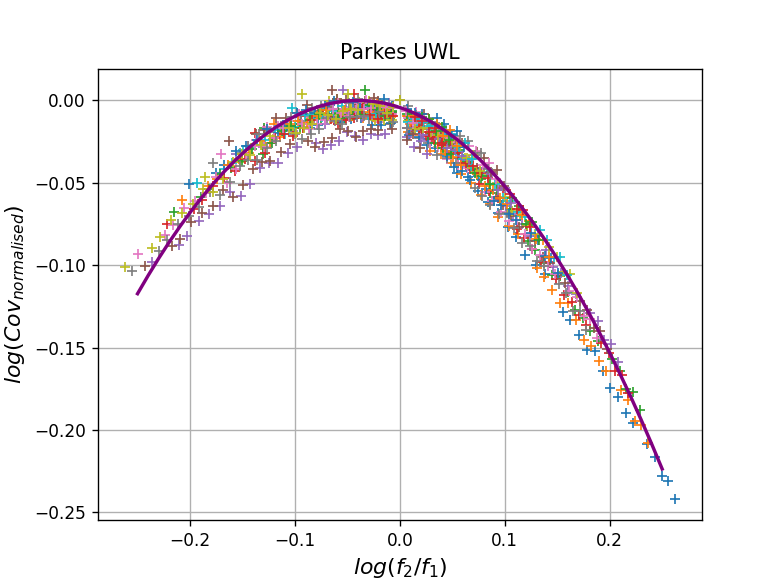

In [68]:
plt.figure()

for chn in np.arange(28):#10*sbplt,10*(sbplt+1)):#R_32p_Entire_spr.shape[0]):
    freq_axis=[]
    corr_axis=[]
    for i in range(Freq_32p_Entire.shape[0]):
        freq_axis.append((np.log10(Freq_32p_Entire[i]/Freq_32p_Entire[chn])**1))
        corr_axis.append(np.log10(Cov_jitter_32p_Entire[i,chn]/Cov_jitter_32p_Entire[chn,chn])**1)
    plt.plot((freq_axis),corr_axis,'+')#,label="$f_{1}=$"+str(int(Freq_32p_Entire[chn])))
plt.title("Parkes UWL")
plt.ylabel("$log(Cov_{normalised})$",size=13)
plt.xlabel("$log(f_{2}/f_{1})$",size=13)
#plt.plot(np.linspace(-0.6,0.6,num=50),fit_parabola(np.linspace(-0.6,0.6,num=50),-2.03,-0.03),'purple',linewidth=2) ## Parkes
#plt.plot(np.linspace(-0.25,0.25,num=50),fit_parabola(np.linspace(-0.25,0.25,num=50)+0.04,-2.66,-0.00),'purple',linewidth=2)  ##MeerKAT

plt.grid()
#plt.legend()

#### Comparing arcs between the telescopes

In [27]:
if telescope=='MeerKAT':
    Cov_jitter_32p_Entire_mk=Cov_jitter_32p_Entire.copy()
    Freq_32p_Entire_mk=Freq_32p_Entire.copy()
if telescope=='Parkes':
    Cov_jitter_32p_Entire_pks=Cov_jitter_32p_Entire[0:13,0:13]
    Freq_32p_Entire_pks=Freq_32p_Entire[0:13]
    #Cov_jitter_32p_Entire_pks=Cov_jitter_32p_Entire.copy()
    #Freq_32p_Entire_pks=Freq_32p_Entire.copy()

<IPython.core.display.Javascript object>


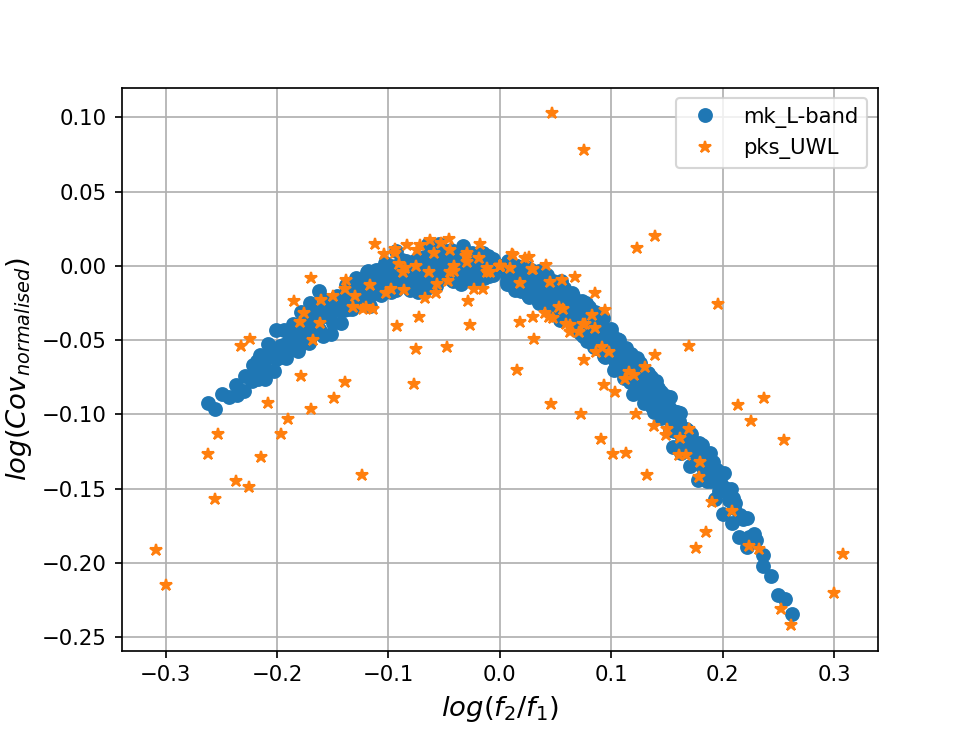

In [32]:
plt.figure()


freq_axis=[]
corr_axis=[]
for chn in np.arange(28):#10*sbplt,10*(sbplt+1)):#R_32p_Entire_spr.shape[0]):
    for i in range(Freq_32p_Entire_mk.shape[0]):
        freq_axis.append((np.log10(Freq_32p_Entire_mk[i]/Freq_32p_Entire_mk[chn])**1))
        corr_axis.append(np.log10(Cov_jitter_32p_Entire_mk[i,chn]/Cov_jitter_32p_Entire_mk[chn,chn])**1)
plt.plot((freq_axis),corr_axis,'o',label='mk_L-band')#,label="$f_{1}=$"+str(int(Freq_32p_Entire[chn])))
#plt.title("Parkes UWL")
plt.ylabel("$log(Cov_{normalised})$",size=13)
plt.xlabel("$log(f_{2}/f_{1})$",size=13)   
    
freq_axis=[]
corr_axis=[]
for chn in np.arange(13):#10*sbplt,10*(sbplt+1)):#R_32p_Entire_spr.shape[0]):
    for i in range(Freq_32p_Entire_pks.shape[0]):
        freq_axis.append((np.log10(Freq_32p_Entire_pks[i]/Freq_32p_Entire_pks[chn])**1))
        corr_axis.append(np.log10(Cov_jitter_32p_Entire_pks[i,chn]/Cov_jitter_32p_Entire_pks[chn,chn])**1)

plt.plot((freq_axis),corr_axis,'*',label='pks_UWL')#,label="$f_{1}=$"+str(int(Freq_32p_Entire[chn])))
#plt.title("Parkes UWL")
plt.ylabel("$log(Cov_{normalised})$",size=13)
plt.xlabel("$log(f_{2}/f_{1})$",size=13)

   
plt.legend()    
#plt.plot(np.linspace(-0.6,0.6,num=50),fit_parabola(np.linspace(-0.6,0.6,num=50),-2.03,-0.03),'purple',linewidth=2) ## Parkes
#plt.plot(np.linspace(-0.25,0.25,num=50),fit_parabola(np.linspace(-0.25,0.25,num=50)+0.04,-2.66,-0.00),'purple',linewidth=2)  ##MeerKAT
#plt.plot(np.linspace(-0.25,0.25,num=50),fit_parabola(np.linspace(-0.25,0.25,num=50)+0.04,-2.66,-0.00),'purple',linewidth=2)  ##MeerKAT
plt.grid()

##### Plotting all together and using it for curve fitting

In [71]:
freq_axis=[]
corr_axis=[]

for chn in np.arange(28):
    for i in range(Freq_32p_Entire.shape[0]):
        freq_axis.append(np.log10(Freq_32p_Entire[i]/Freq_32p_Entire[chn]))
        corr_axis.append(np.log10(Cov_jitter_32p_Entire[i,chn]/Cov_jitter_32p_Entire[chn,chn]))
sort_index=np.array(freq_axis).argsort()        

In [72]:
freq_axis_sorted=np.array(freq_axis)[sort_index]
corr_axis_sorted=np.array(corr_axis)[sort_index]

<IPython.core.display.Javascript object>


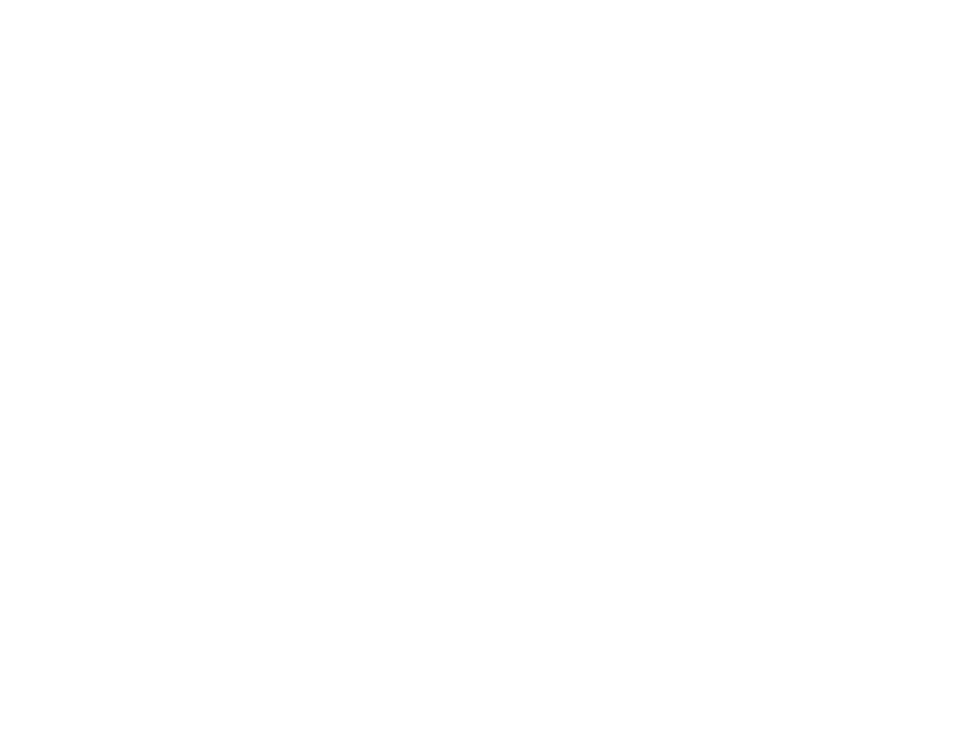

Text(0.5, 1.0, 'Parkes')

In [73]:
plt.figure()
plt.plot(freq_axis_sorted,corr_axis_sorted,'o')
plt.plot(freq_axis_sorted,fit_parabola(freq_axis_sorted,-2.66,-0.004),'orange')  ##MeerKAT

#plt.plot(freq_axis_sorted,fit_offset_parabola(freq_axis_sorted,-2.55,0,-0.05),'black')  ### MeerKAT

#plt.plot(freq_axis_sorted,fit_parabola(freq_axis_sorted,-2.03,-0.03),'orange') ## Parkes

#plt.plot(freq_axis_sorted,fit_offset_parabola(freq_axis_sorted,-1.85,-0.02,-0.05),'black')  ### Parkes

plt.xlabel("$log(f_{2}/f_{1})$",size=13)
plt.ylabel("$log(Cov_{normalised})$",size=13)
plt.grid()
plt.title(telescope)




### Fitting a parabola to the normalised covariance 

##### fitting parabola with offset

17:01 bilby INFO    : Running for label 'label', output will be saved to '/home/akulkarn/notebooks/bilby_result_CovarPara_fit/Parkes/with_offset/'
17:01 bilby INFO    : Search parameters:
17:01 bilby INFO    :   a = Uniform(minimum=-10, maximum=0, name='a', latex_label='a', unit=None, boundary=None)
17:01 bilby INFO    :   off = Uniform(minimum=-0.2, maximum=0.2, name='off', latex_label='off', unit=None, boundary=None)
17:01 bilby INFO    :   b = Uniform(minimum=-1, maximum=1, name='b', latex_label='b', unit=None, boundary=None)
17:01 bilby INFO    :   sigma = Uniform(minimum=0, maximum=1, name='sigma', latex_label='sigma', unit=None, boundary=None)
17:01 bilby INFO    : Single likelihood evaluation took 8.554e-05 s


0it [00:00, ?it/s]

17:01 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'print_progress': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 250, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 150, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f3ebaa493a0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5, 'print_method': 'tqdm'}
17:01 bilby INFO    : Checkpoint every check_point_delta_t = 600s
17:01 bilby INFO    : Using dynesty version 1.0.1
17:01 bilby INFO    : Using the bilby-implemented rw

<IPython.core.display.Javascript object>


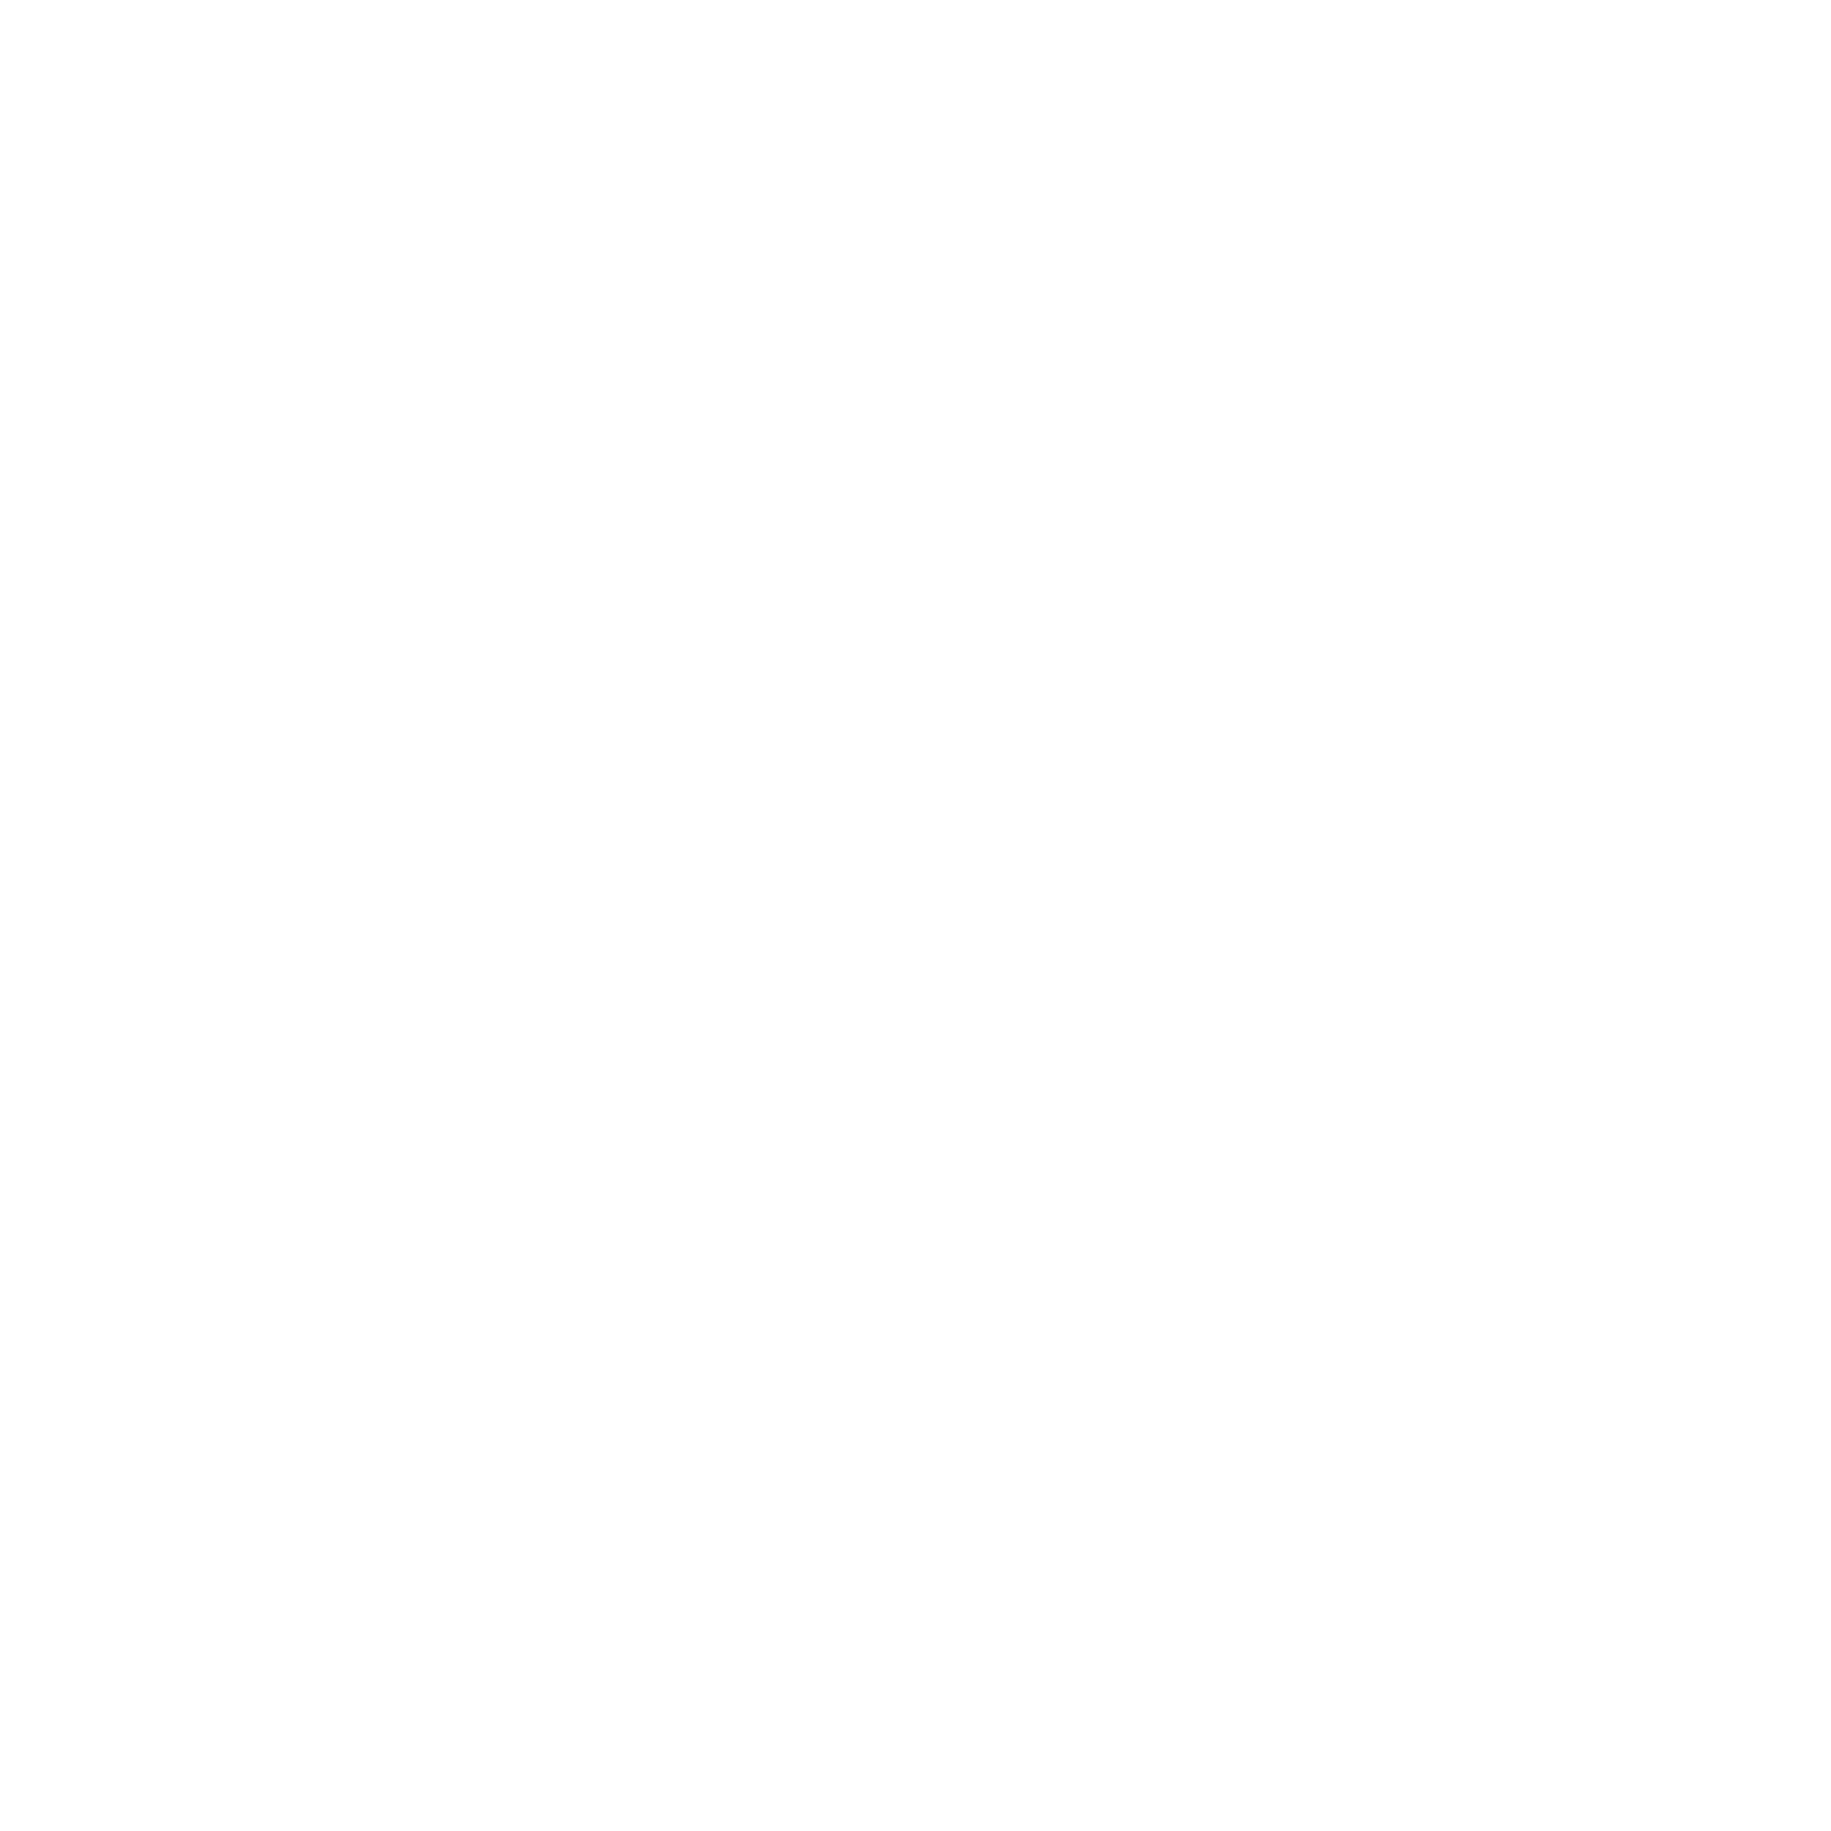

/home/akulkarn/.conda/envs/py3/lib/python3.8/site-packages/dynesty/utils.py:171: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.zeros(nsamples, dtype=np.int)


<IPython.core.display.Javascript object>


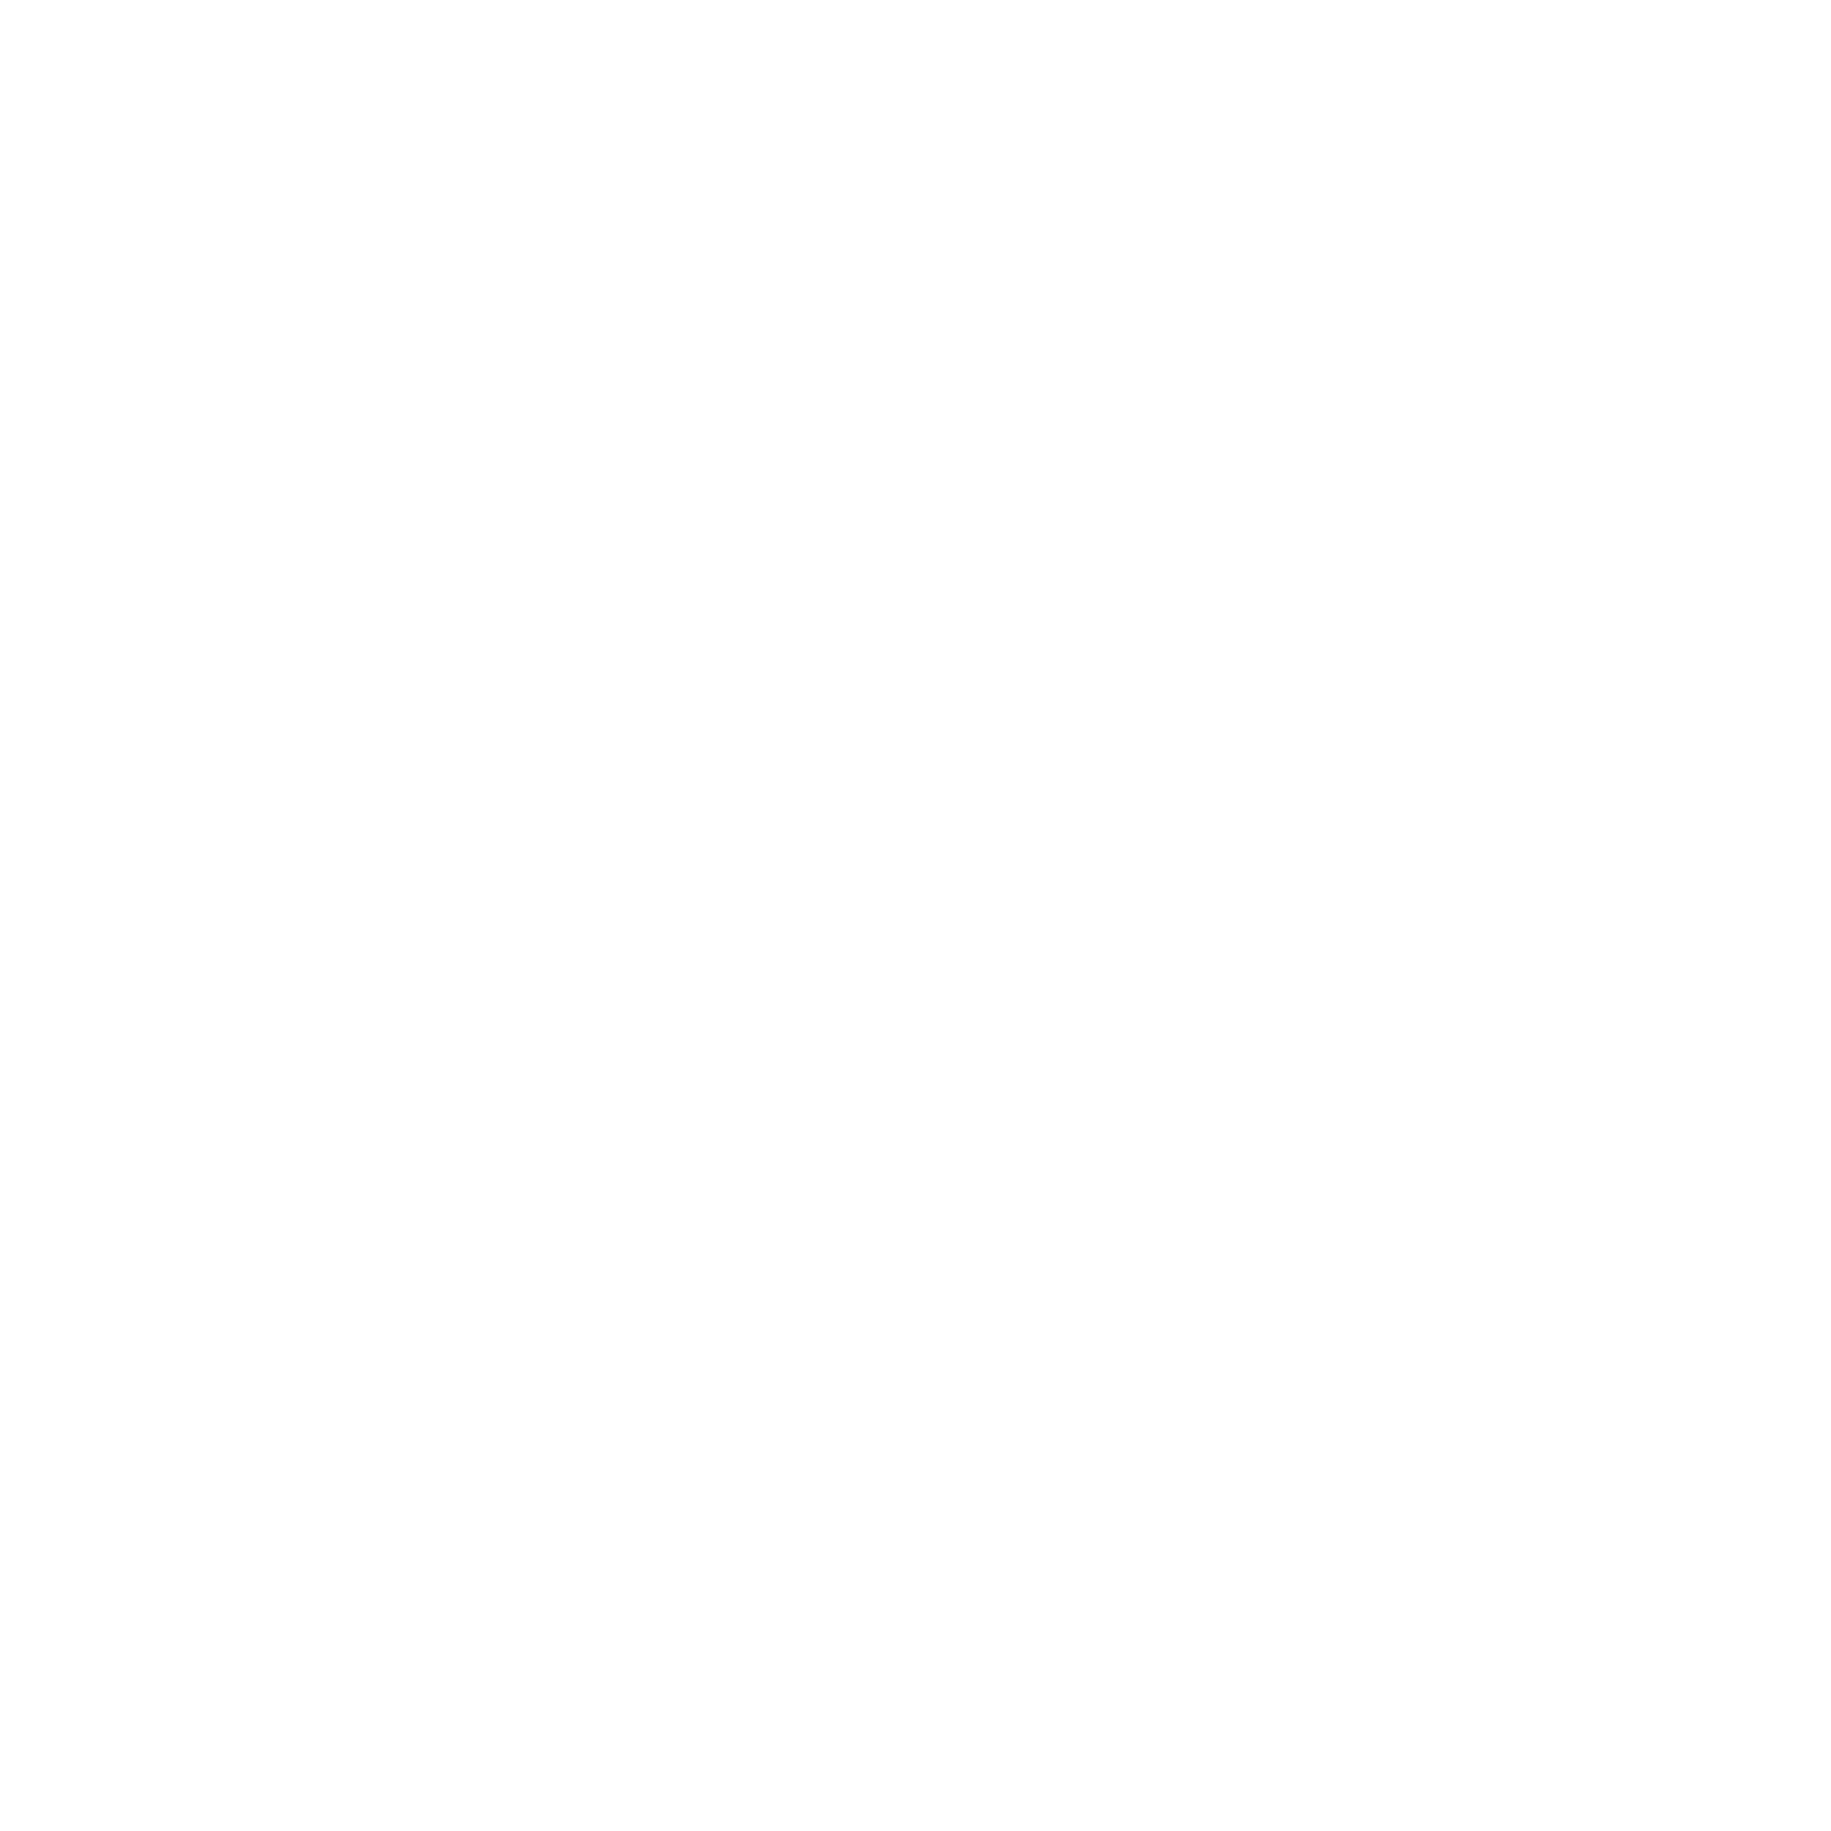

/home/akulkarn/.conda/envs/py3/lib/python3.8/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/akulkarn/.conda/envs/py3/lib/python3.8/site-packages/dynesty/utils.py:171: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.zeros(nsamples, dtype=np.int)
/home/akulkarn/.conda/envs/py3/lib/python3.8/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))


<IPython.core.display.Javascript object>


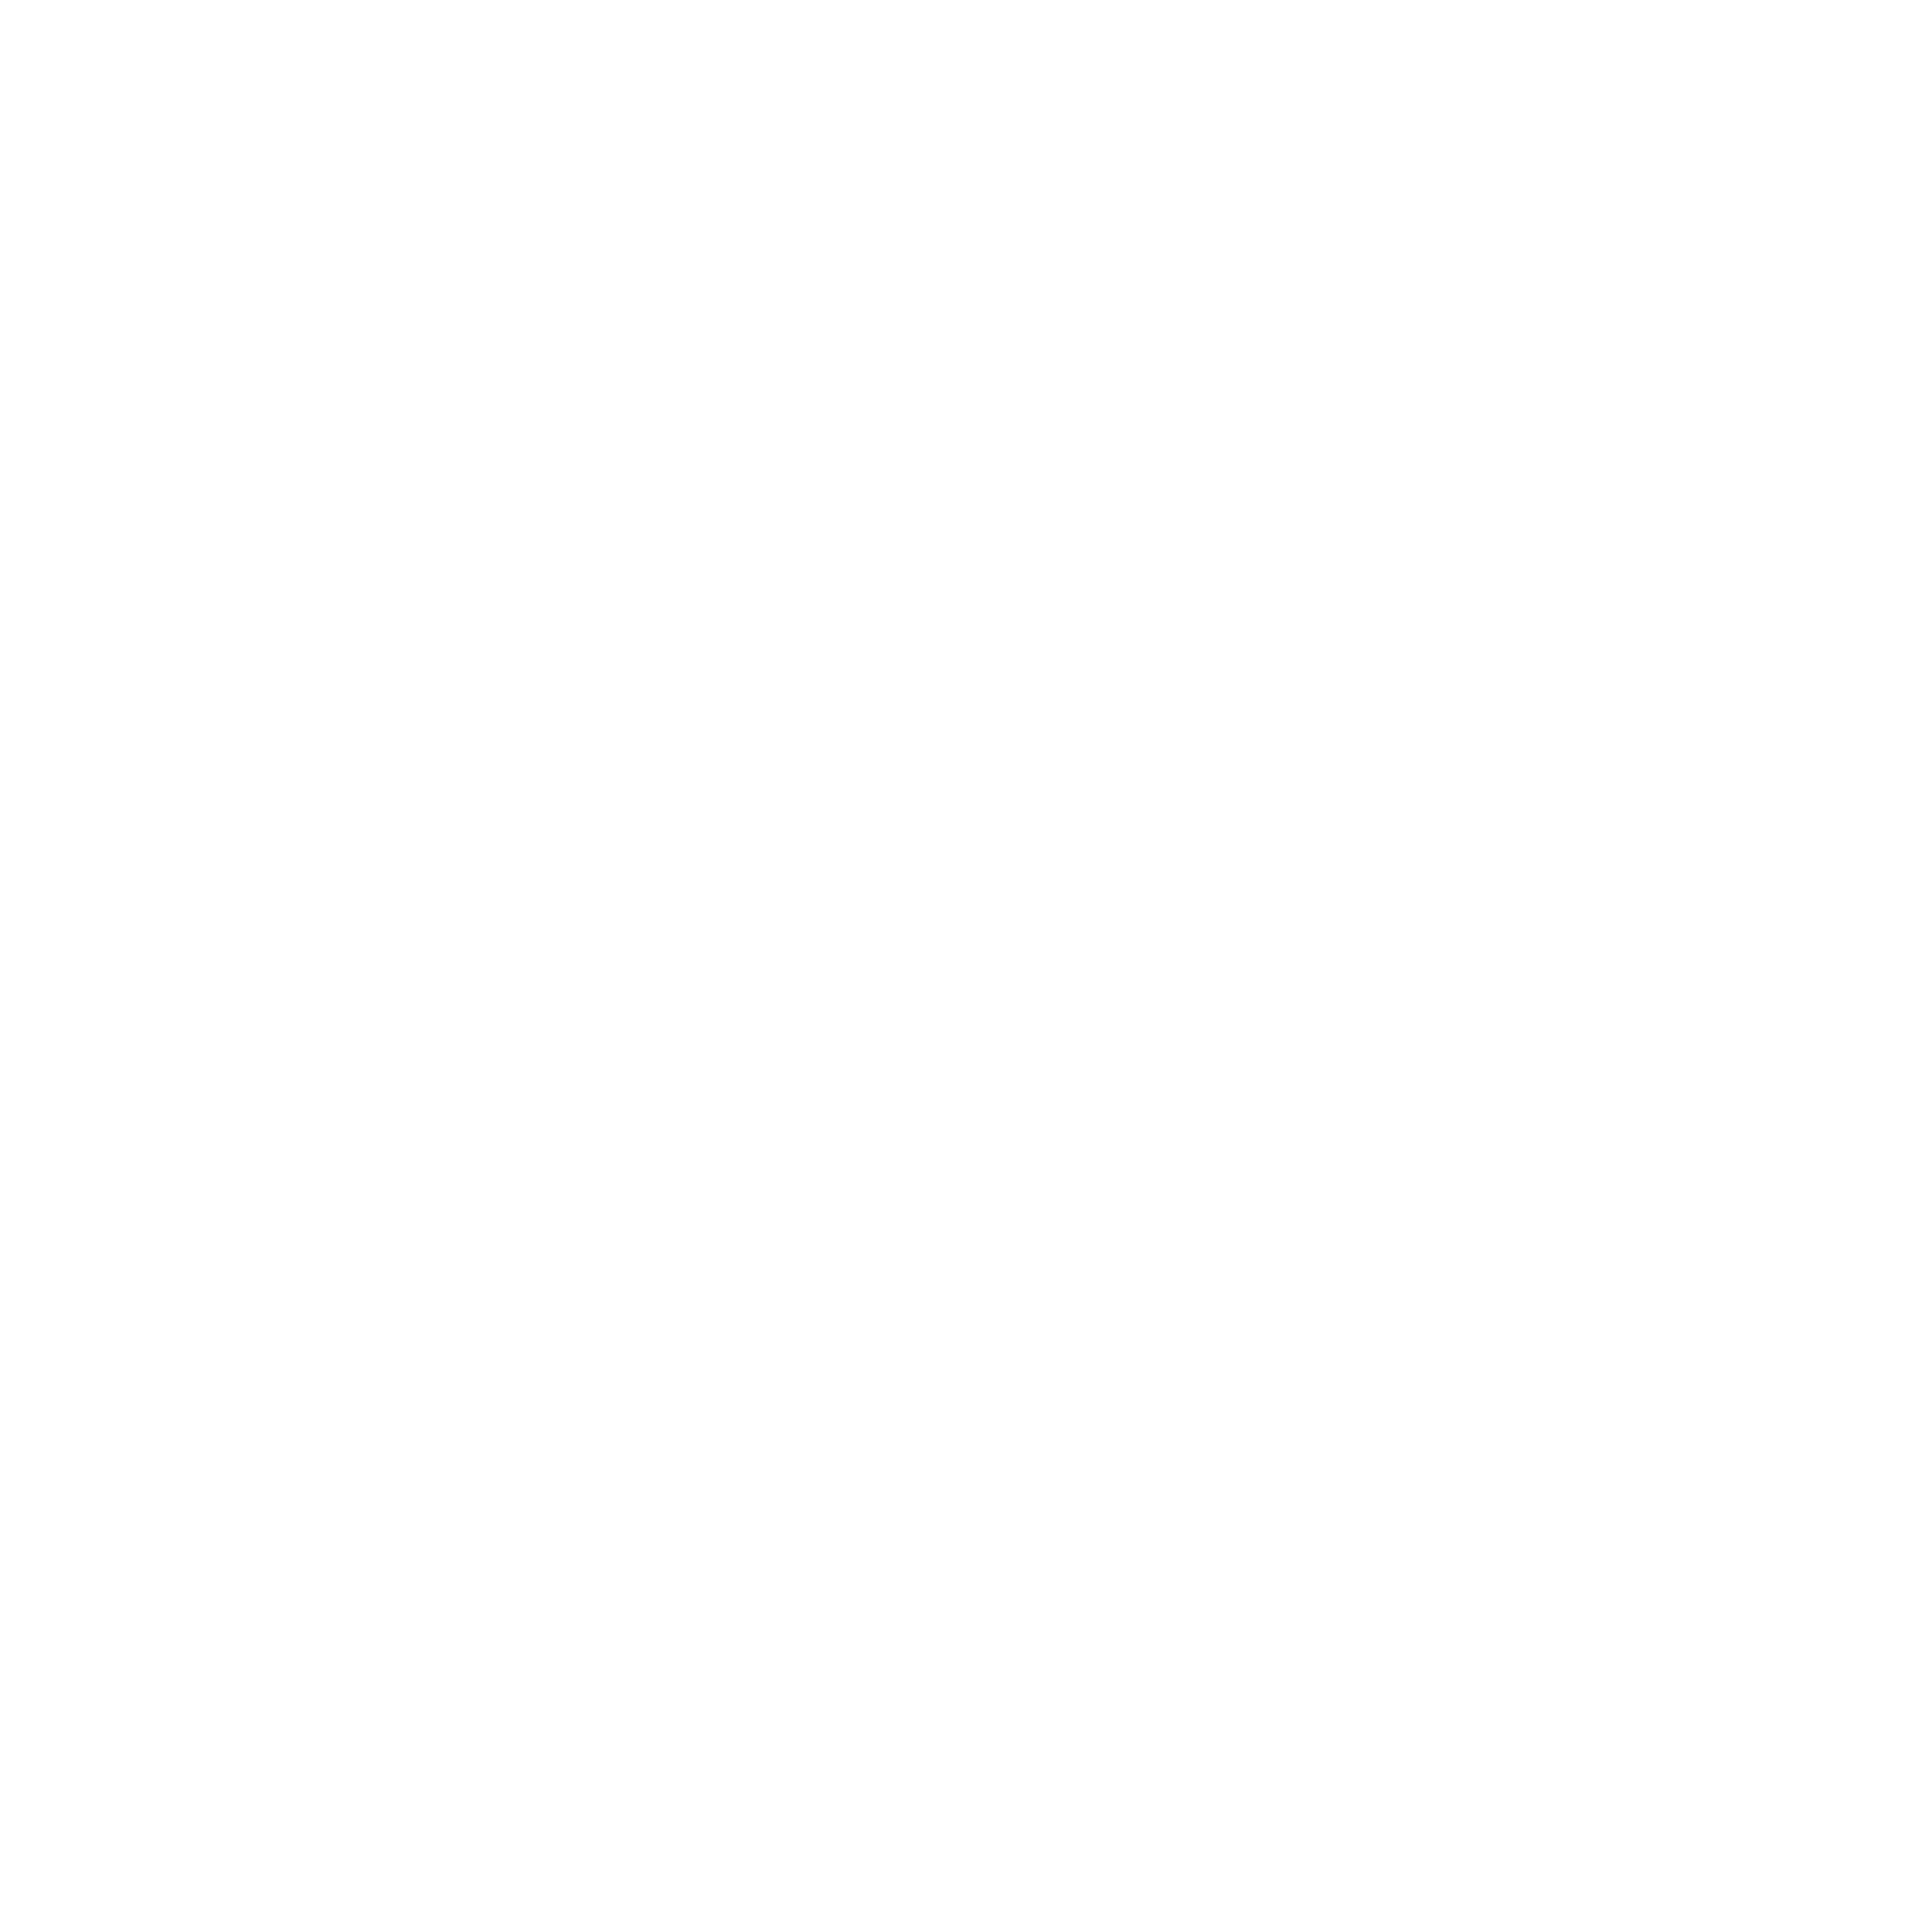

17:03 bilby WARNING : Axis limits cannot be NaN or Inf
17:03 bilby WARNING : Failed to create dynesty run plot at checkpoint


<IPython.core.display.Javascript object>


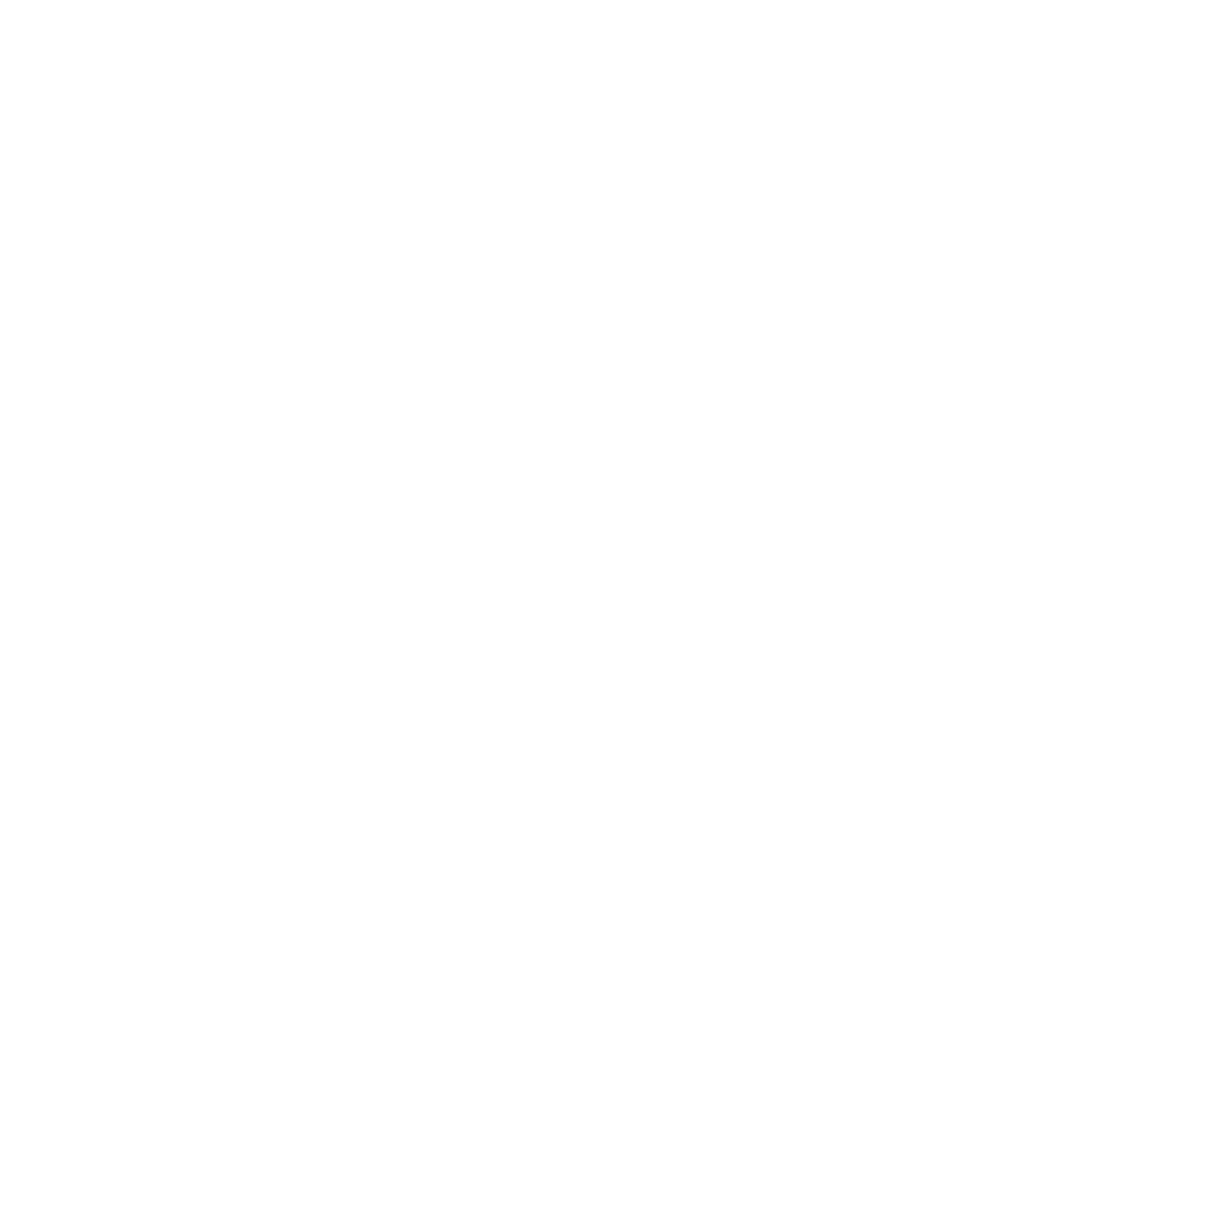

/home/akulkarn/.conda/envs/py3/lib/python3.8/site-packages/dynesty/utils.py:171: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.zeros(nsamples, dtype=np.int)
17:03 bilby INFO    : Sampling time: 0:01:57.141263
17:03 bilby INFO    : Summary of results:
nsamples: 5836
ln_noise_evidence:    nan
ln_evidence: 1044.796 +/-  0.383
ln_bayes_factor:    nan +/-  0.383



<IPython.core.display.Javascript object>


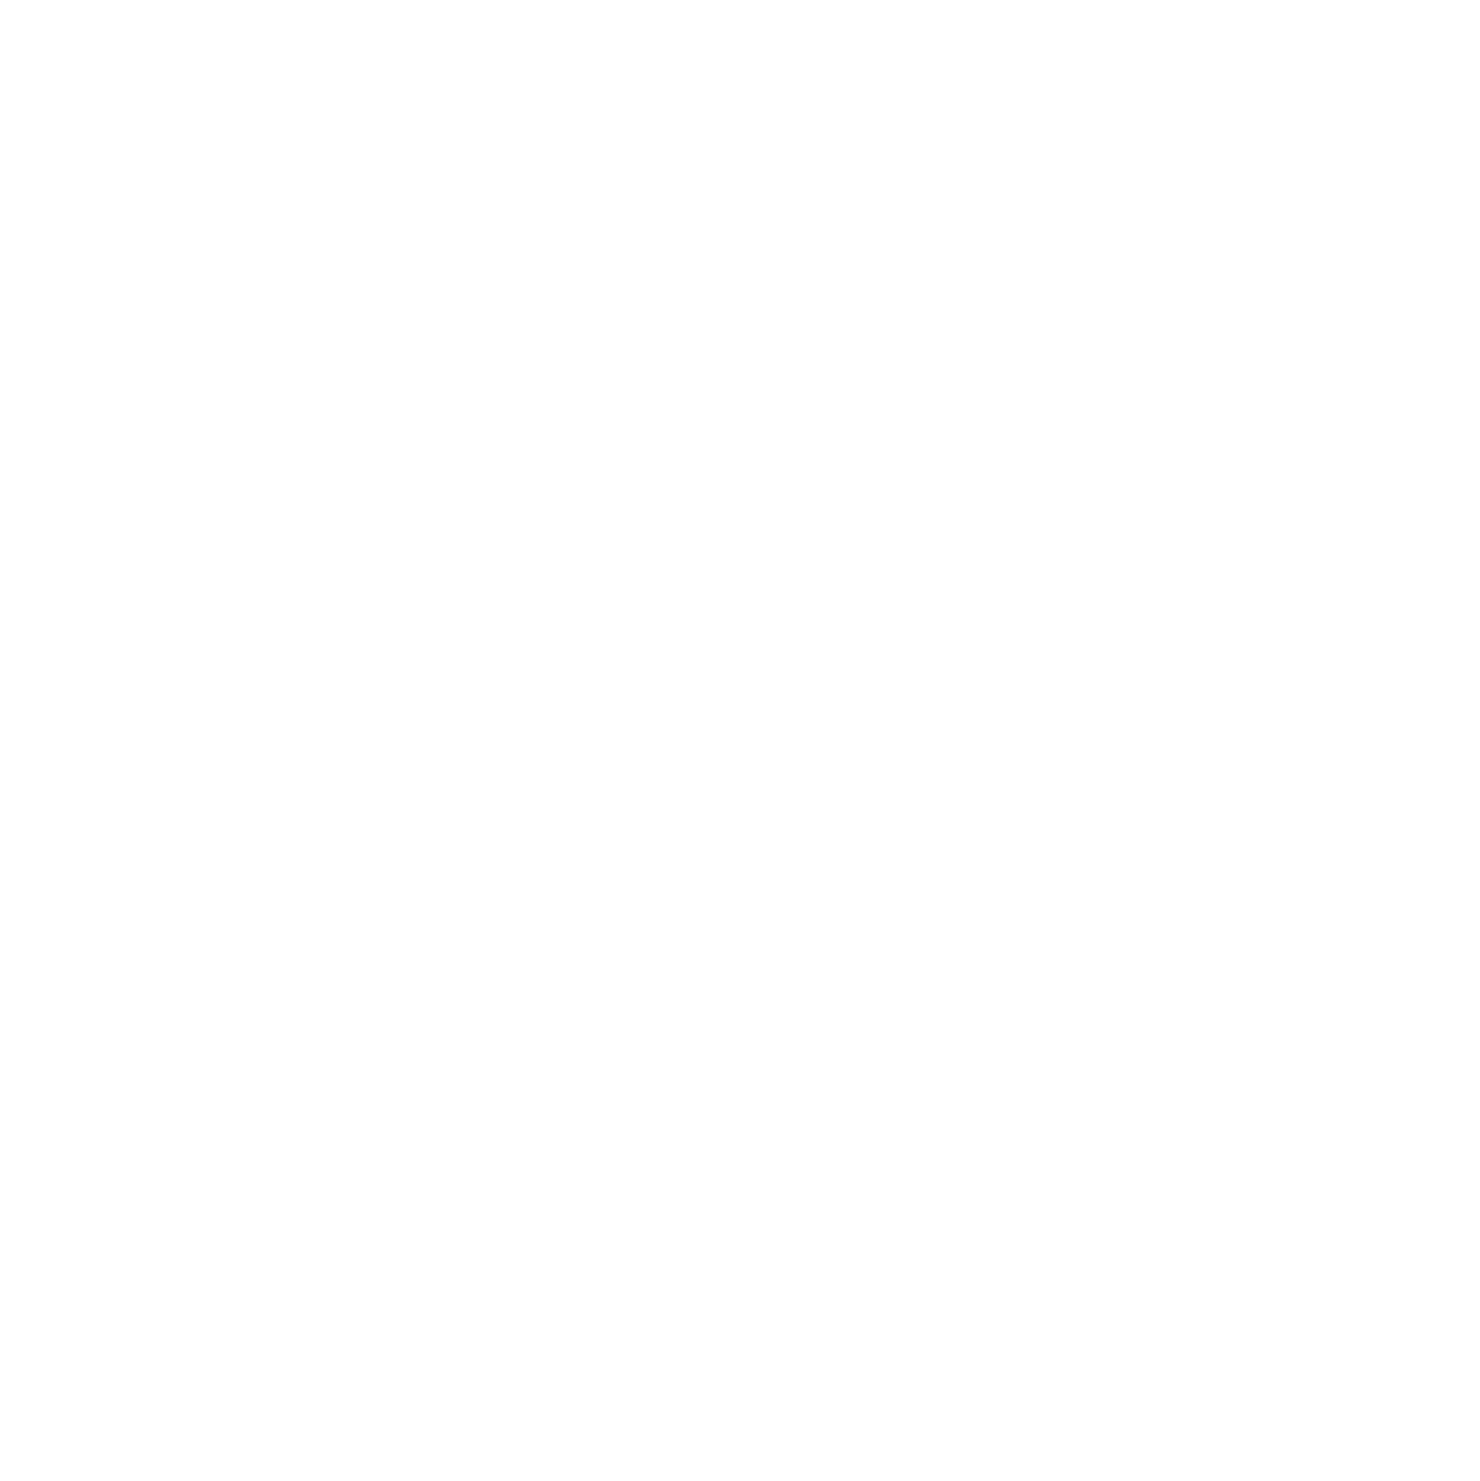

<IPython.core.display.Javascript object>


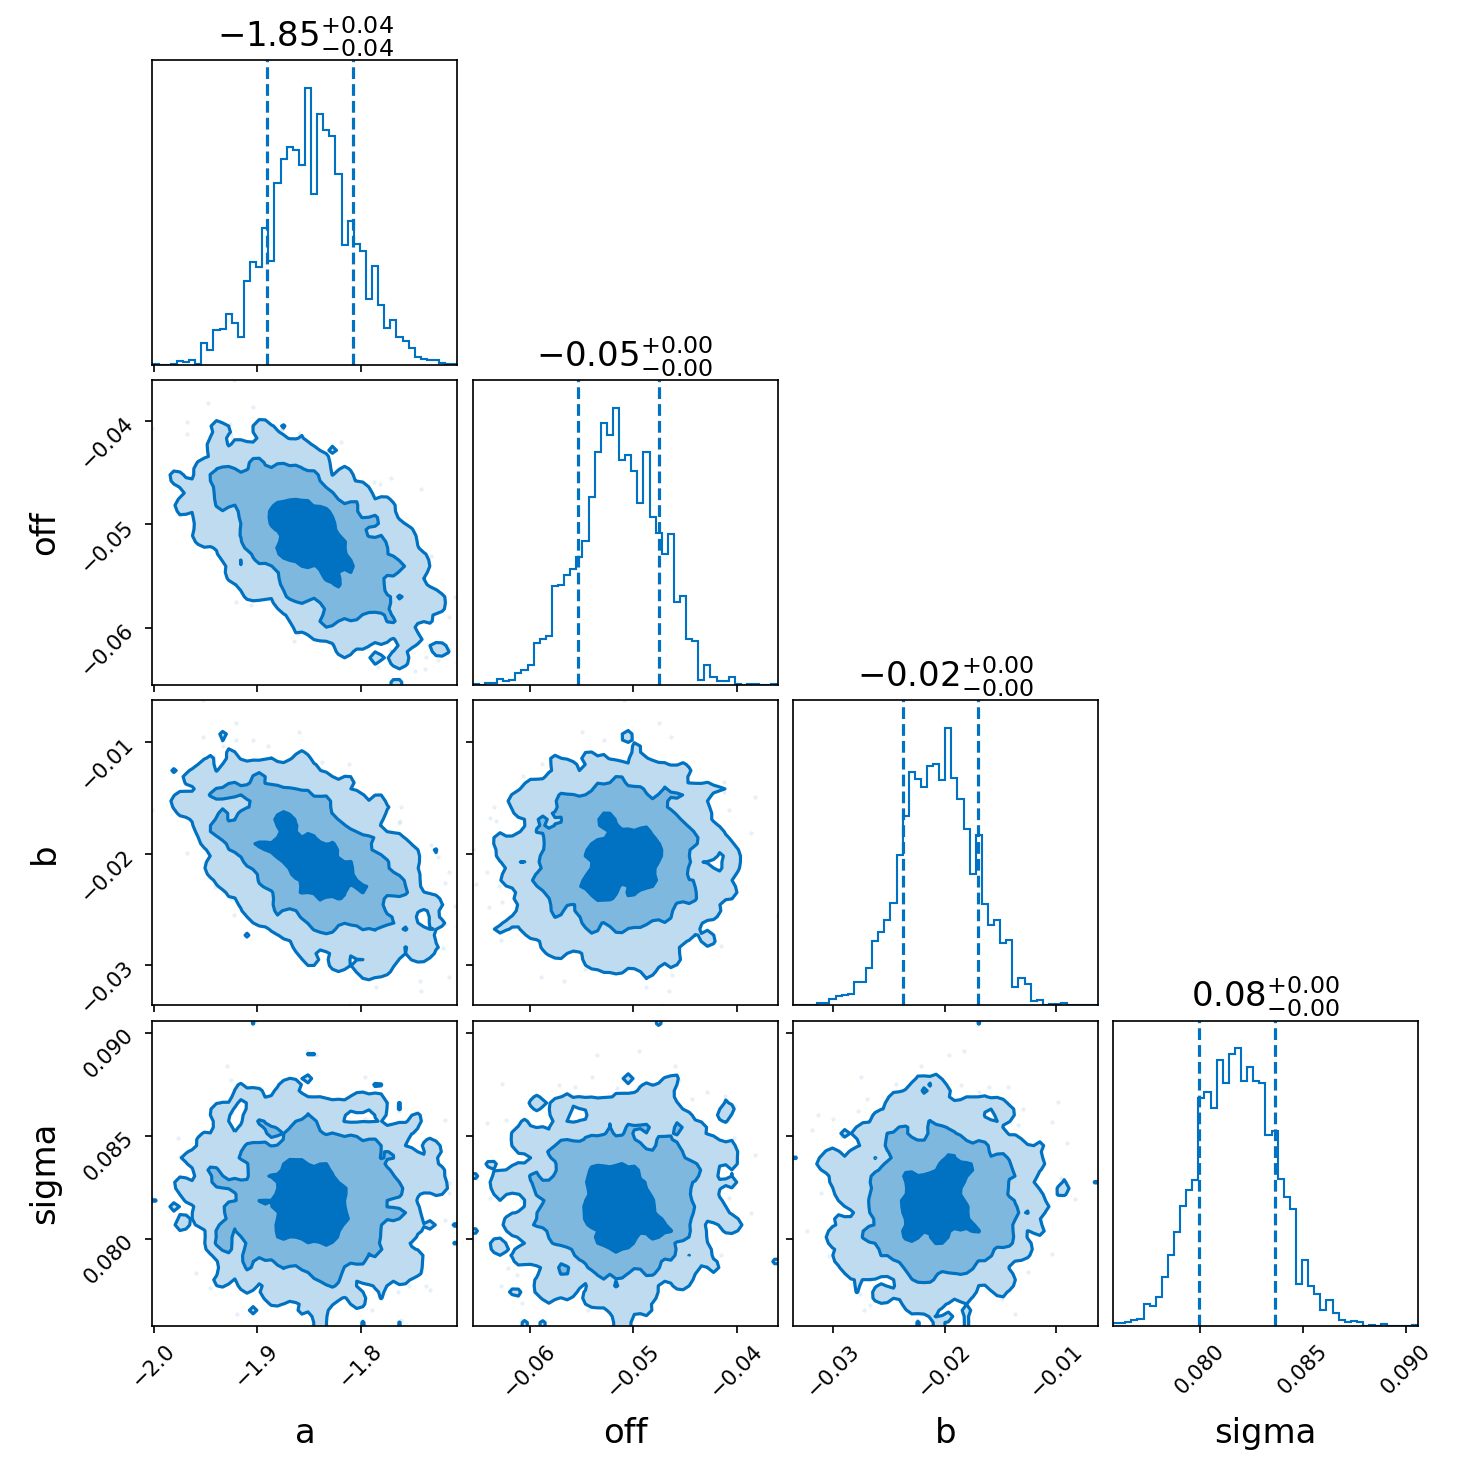

In [74]:

outdir=os.path.join('/home/akulkarn/notebooks/bilby_result_CovarPara_fit/', telescope,'with_offset/')

likelihood=bilby.likelihood.GaussianLikelihood(freq_axis_sorted,corr_axis_sorted,fit_offset_parabola)
priors=dict()
priors["a"]=bilby.core.prior.Uniform(-10,0,"a")
priors["off"]=bilby.core.prior.Uniform(-0.2,0.2,"off")
priors["b"]=bilby.core.prior.Uniform(-1,1,"b")
priors["sigma"]=bilby.core.prior.Uniform(0,1,"sigma")

result_blb = bilby.run_sampler(
        likelihood=likelihood,
        priors=priors,
        sampler="dynesty",
        nlive=250,
        outdir=outdir,
        clean=True
    )
result_blb.plot_corner()

##### fitting parabola without offset

17:01 bilby INFO    : Running for label 'label', output will be saved to '/home/akulkarn/notebooks/bilby_result_CovarPara_fit/Parkes/with_offset/'
17:01 bilby INFO    : Search parameters:
17:01 bilby INFO    :   a = Uniform(minimum=-10, maximum=0, name='a', latex_label='a', unit=None, boundary=None)
17:01 bilby INFO    :   off = Uniform(minimum=-0.2, maximum=0.2, name='off', latex_label='off', unit=None, boundary=None)
17:01 bilby INFO    :   b = Uniform(minimum=-1, maximum=1, name='b', latex_label='b', unit=None, boundary=None)
17:01 bilby INFO    :   sigma = Uniform(minimum=0, maximum=1, name='sigma', latex_label='sigma', unit=None, boundary=None)
17:01 bilby INFO    : Single likelihood evaluation took 8.554e-05 s


0it [00:00, ?it/s]

17:01 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'print_progress': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 250, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 150, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f3ebaa493a0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5, 'print_method': 'tqdm'}
17:01 bilby INFO    : Checkpoint every check_point_delta_t = 600s
17:01 bilby INFO    : Using dynesty version 1.0.1
17:01 bilby INFO    : Using the bilby-implemented rw

<IPython.core.display.Javascript object>


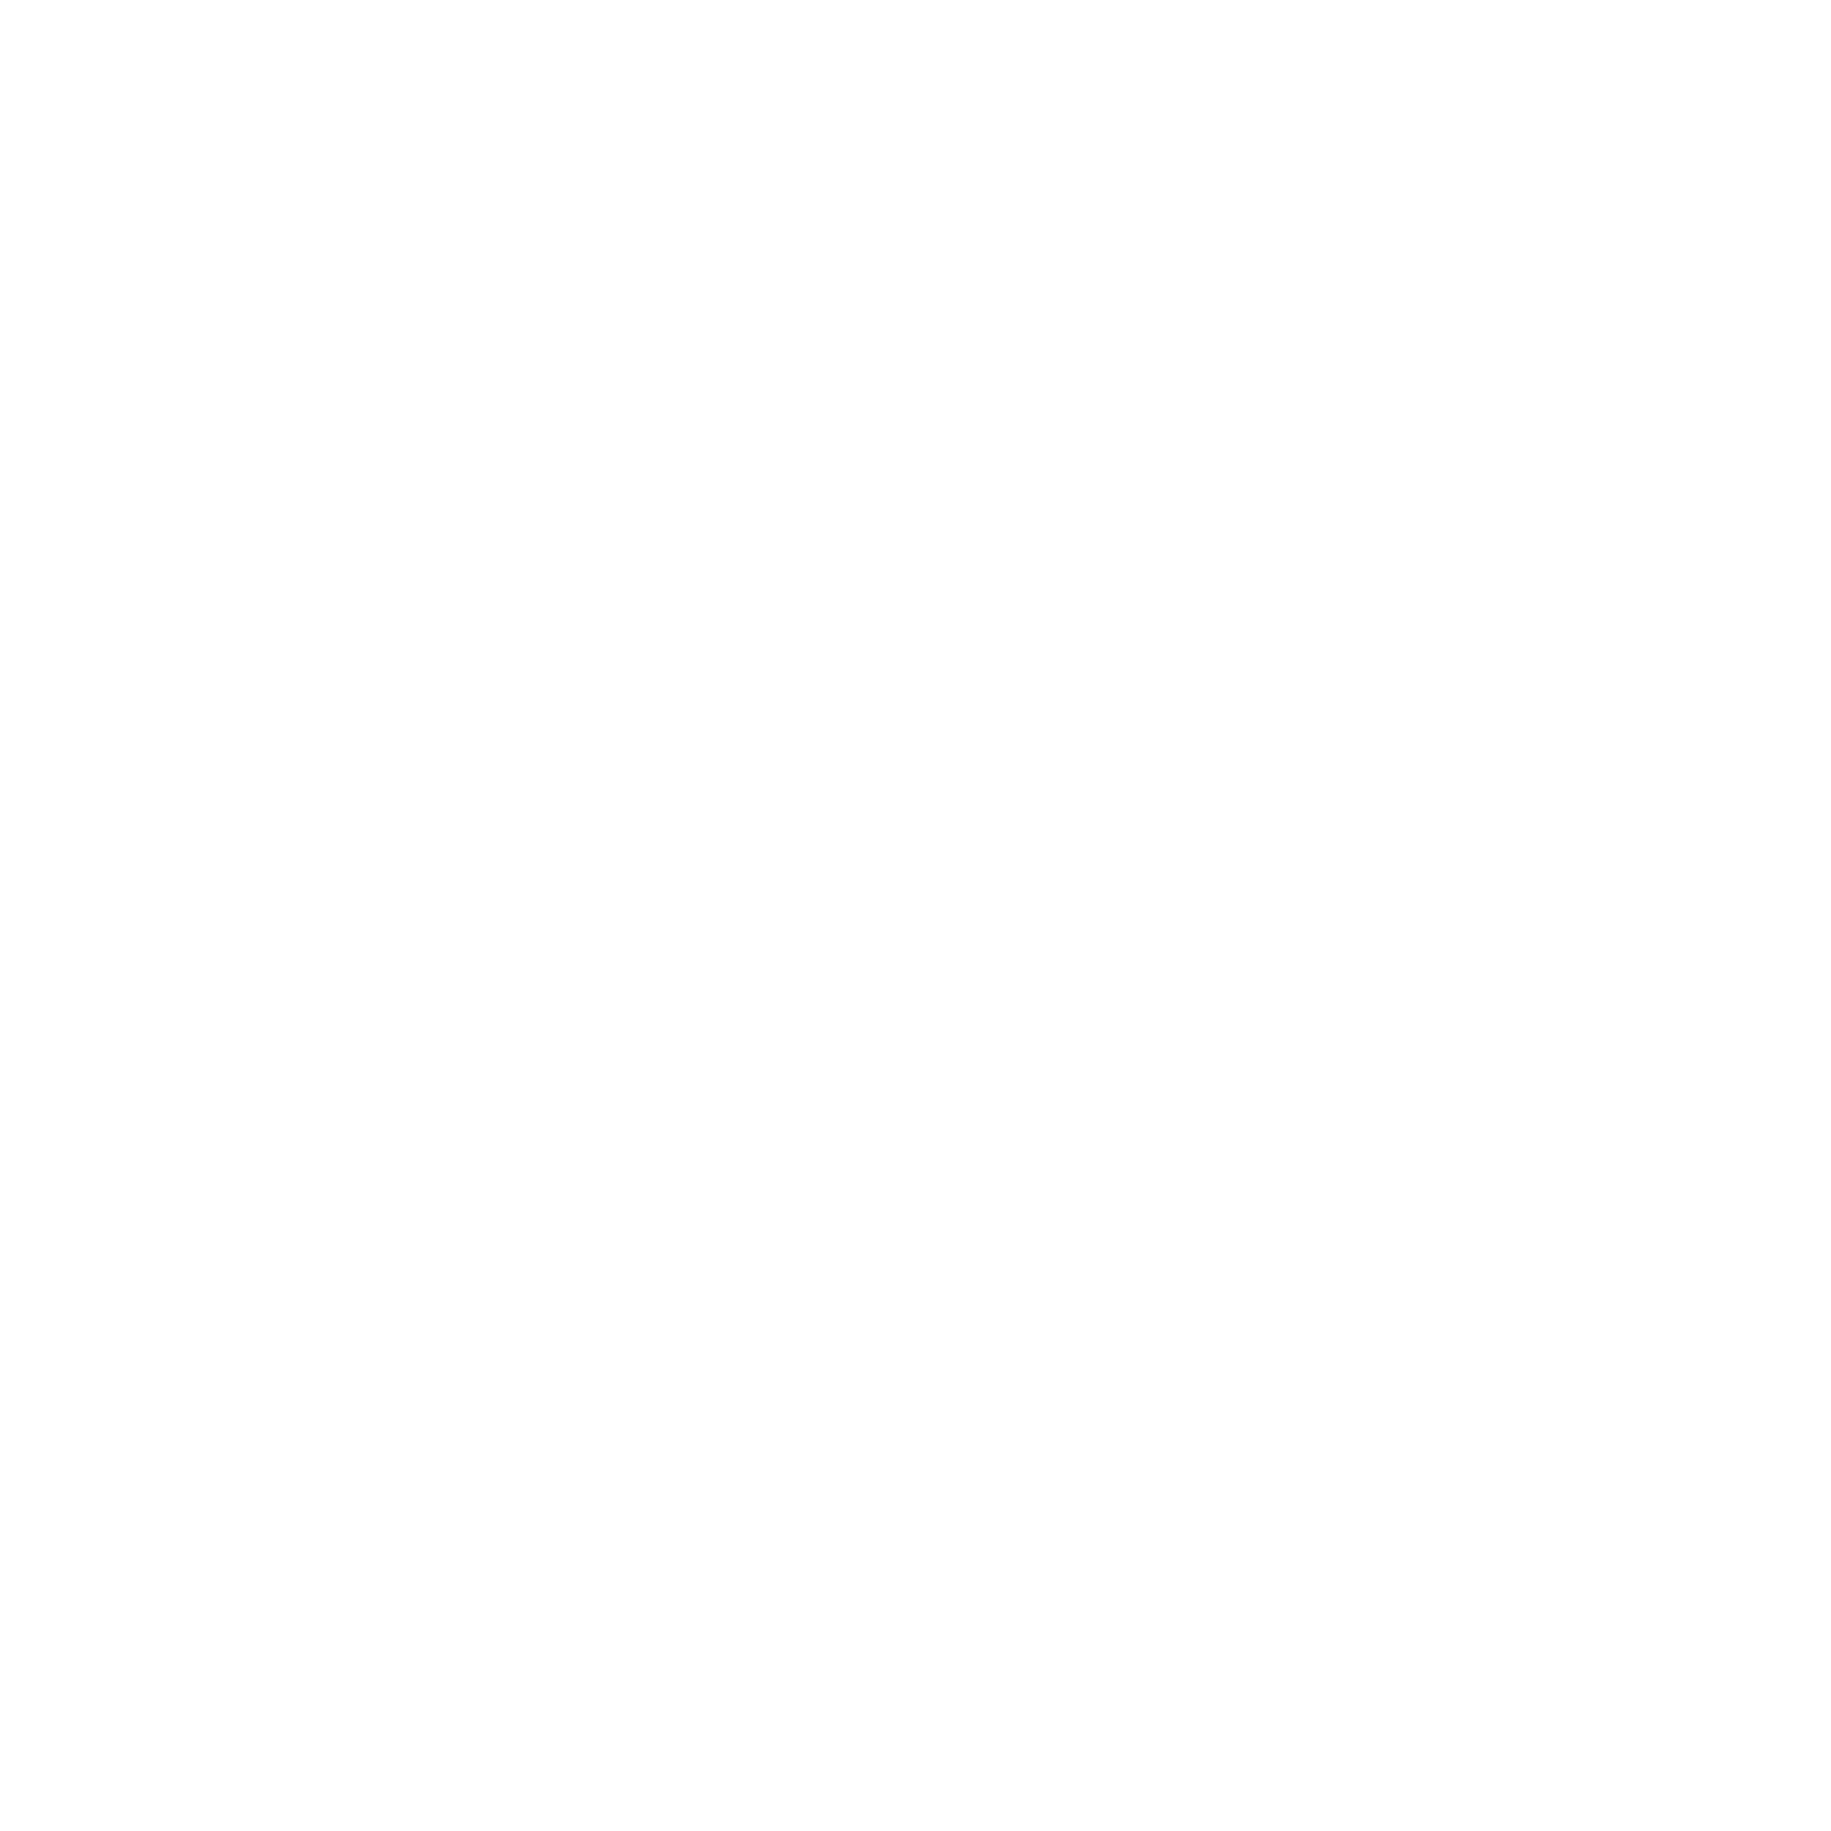

/home/akulkarn/.conda/envs/py3/lib/python3.8/site-packages/dynesty/utils.py:171: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.zeros(nsamples, dtype=np.int)


<IPython.core.display.Javascript object>


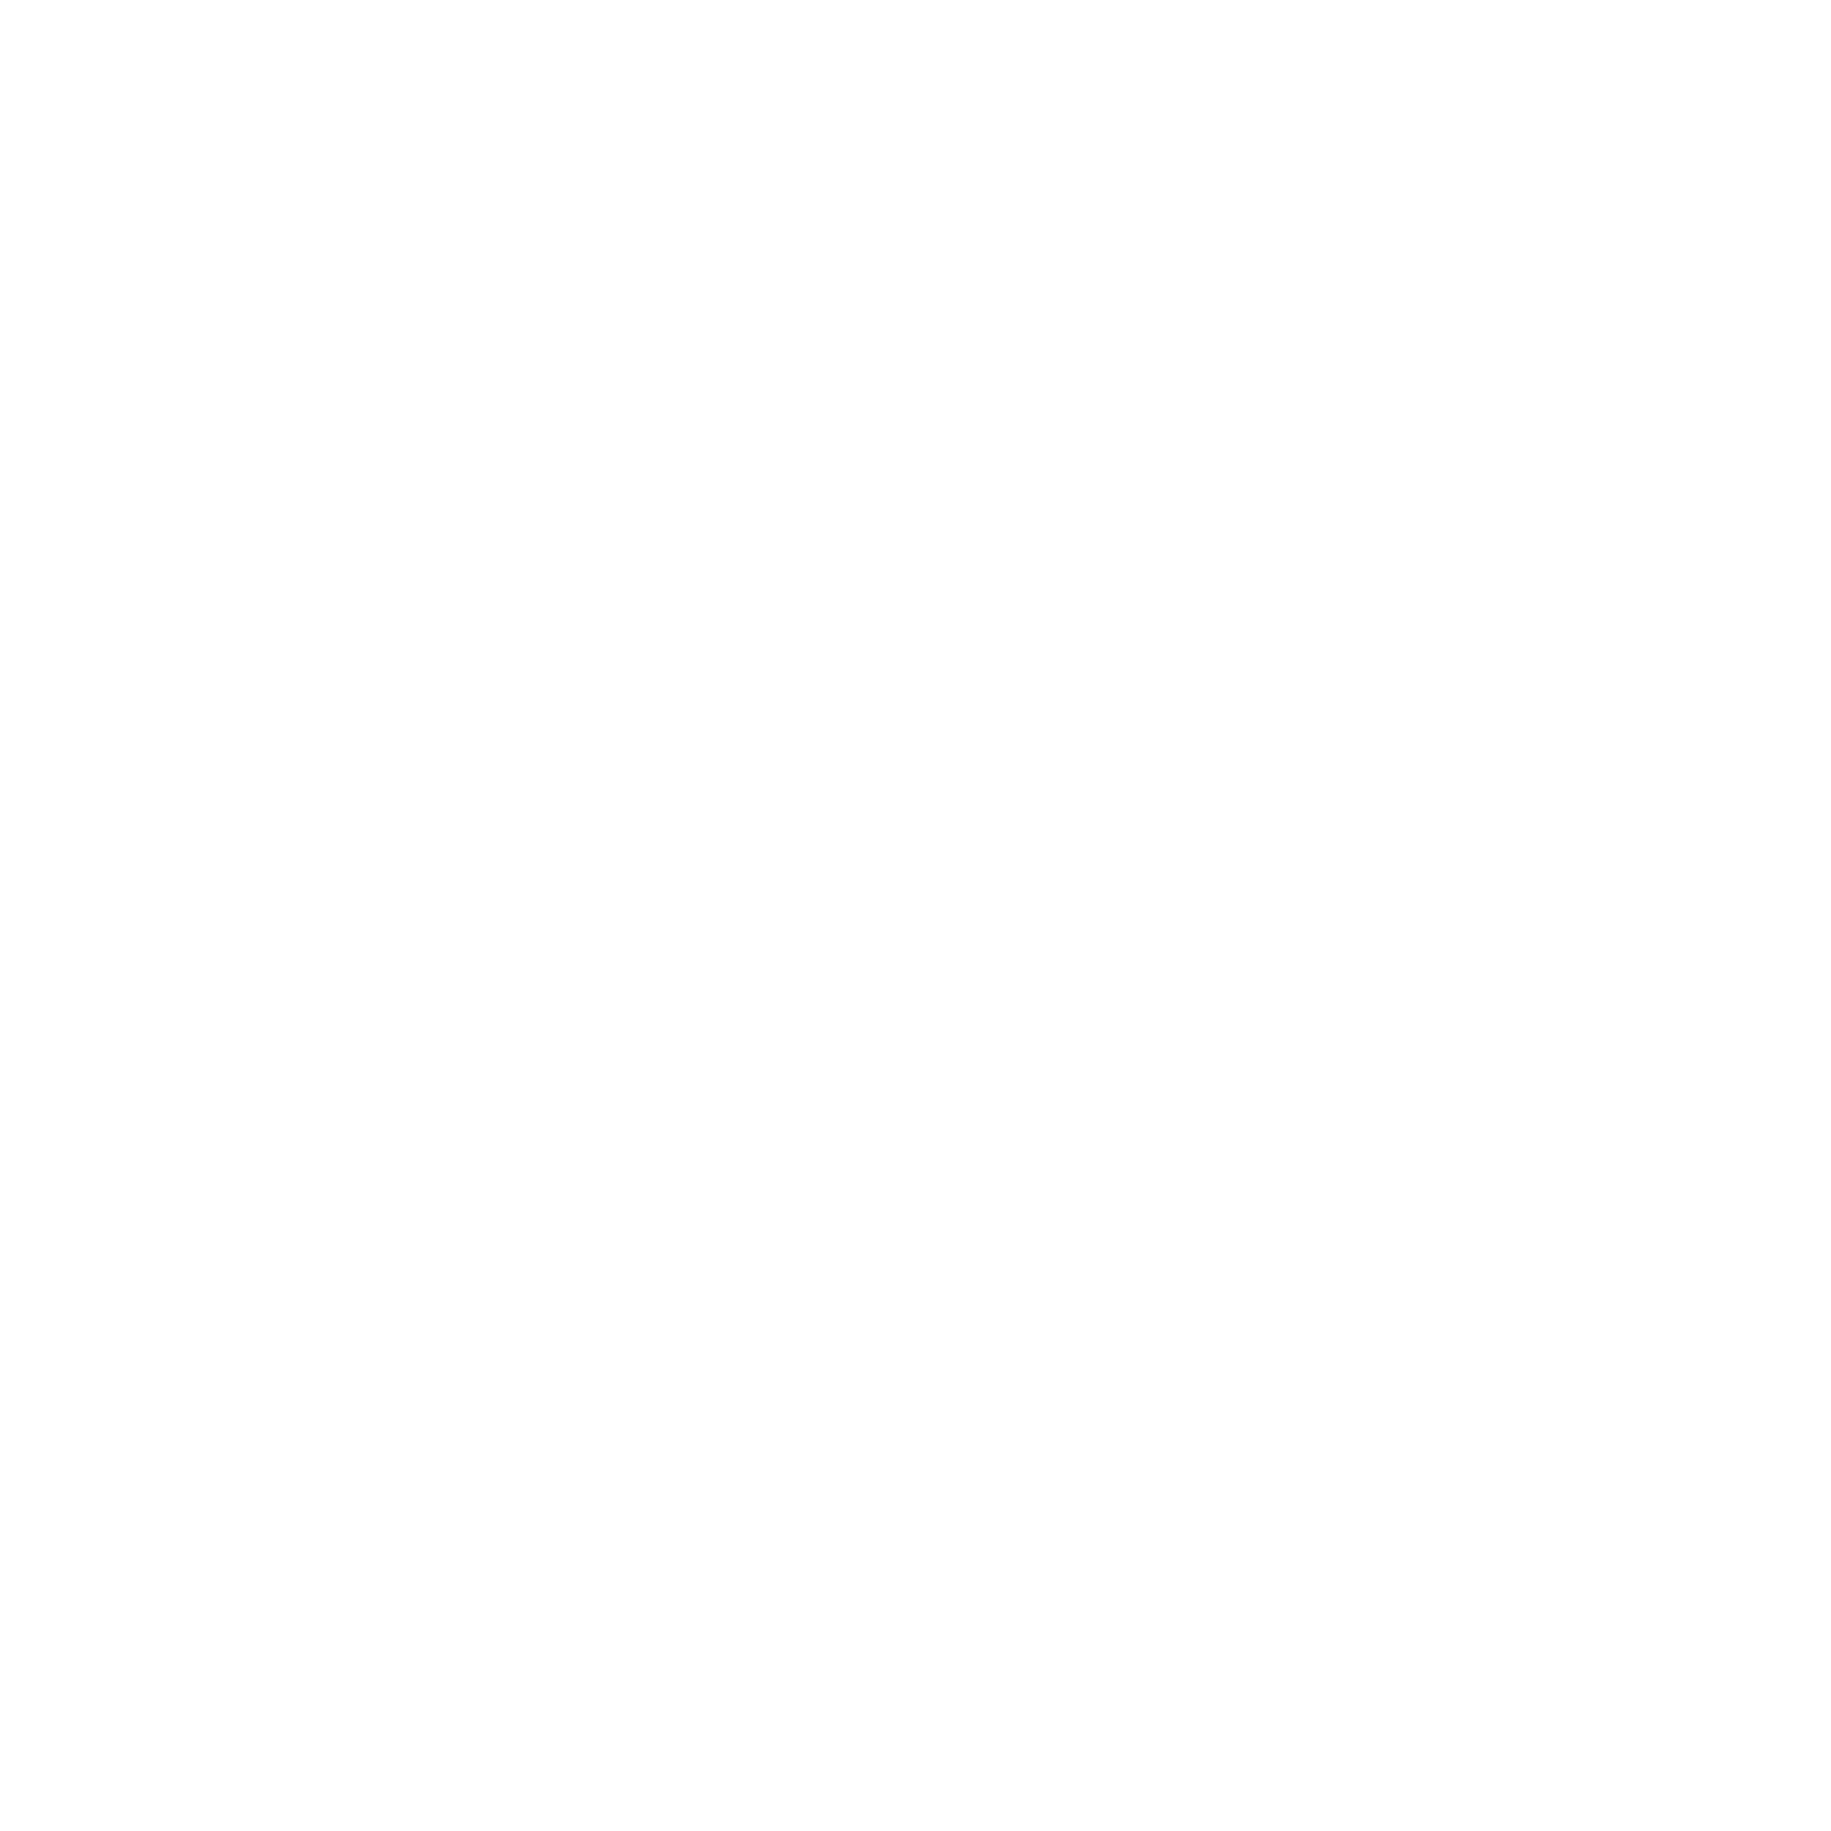

/home/akulkarn/.conda/envs/py3/lib/python3.8/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/akulkarn/.conda/envs/py3/lib/python3.8/site-packages/dynesty/utils.py:171: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.zeros(nsamples, dtype=np.int)
/home/akulkarn/.conda/envs/py3/lib/python3.8/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))


<IPython.core.display.Javascript object>


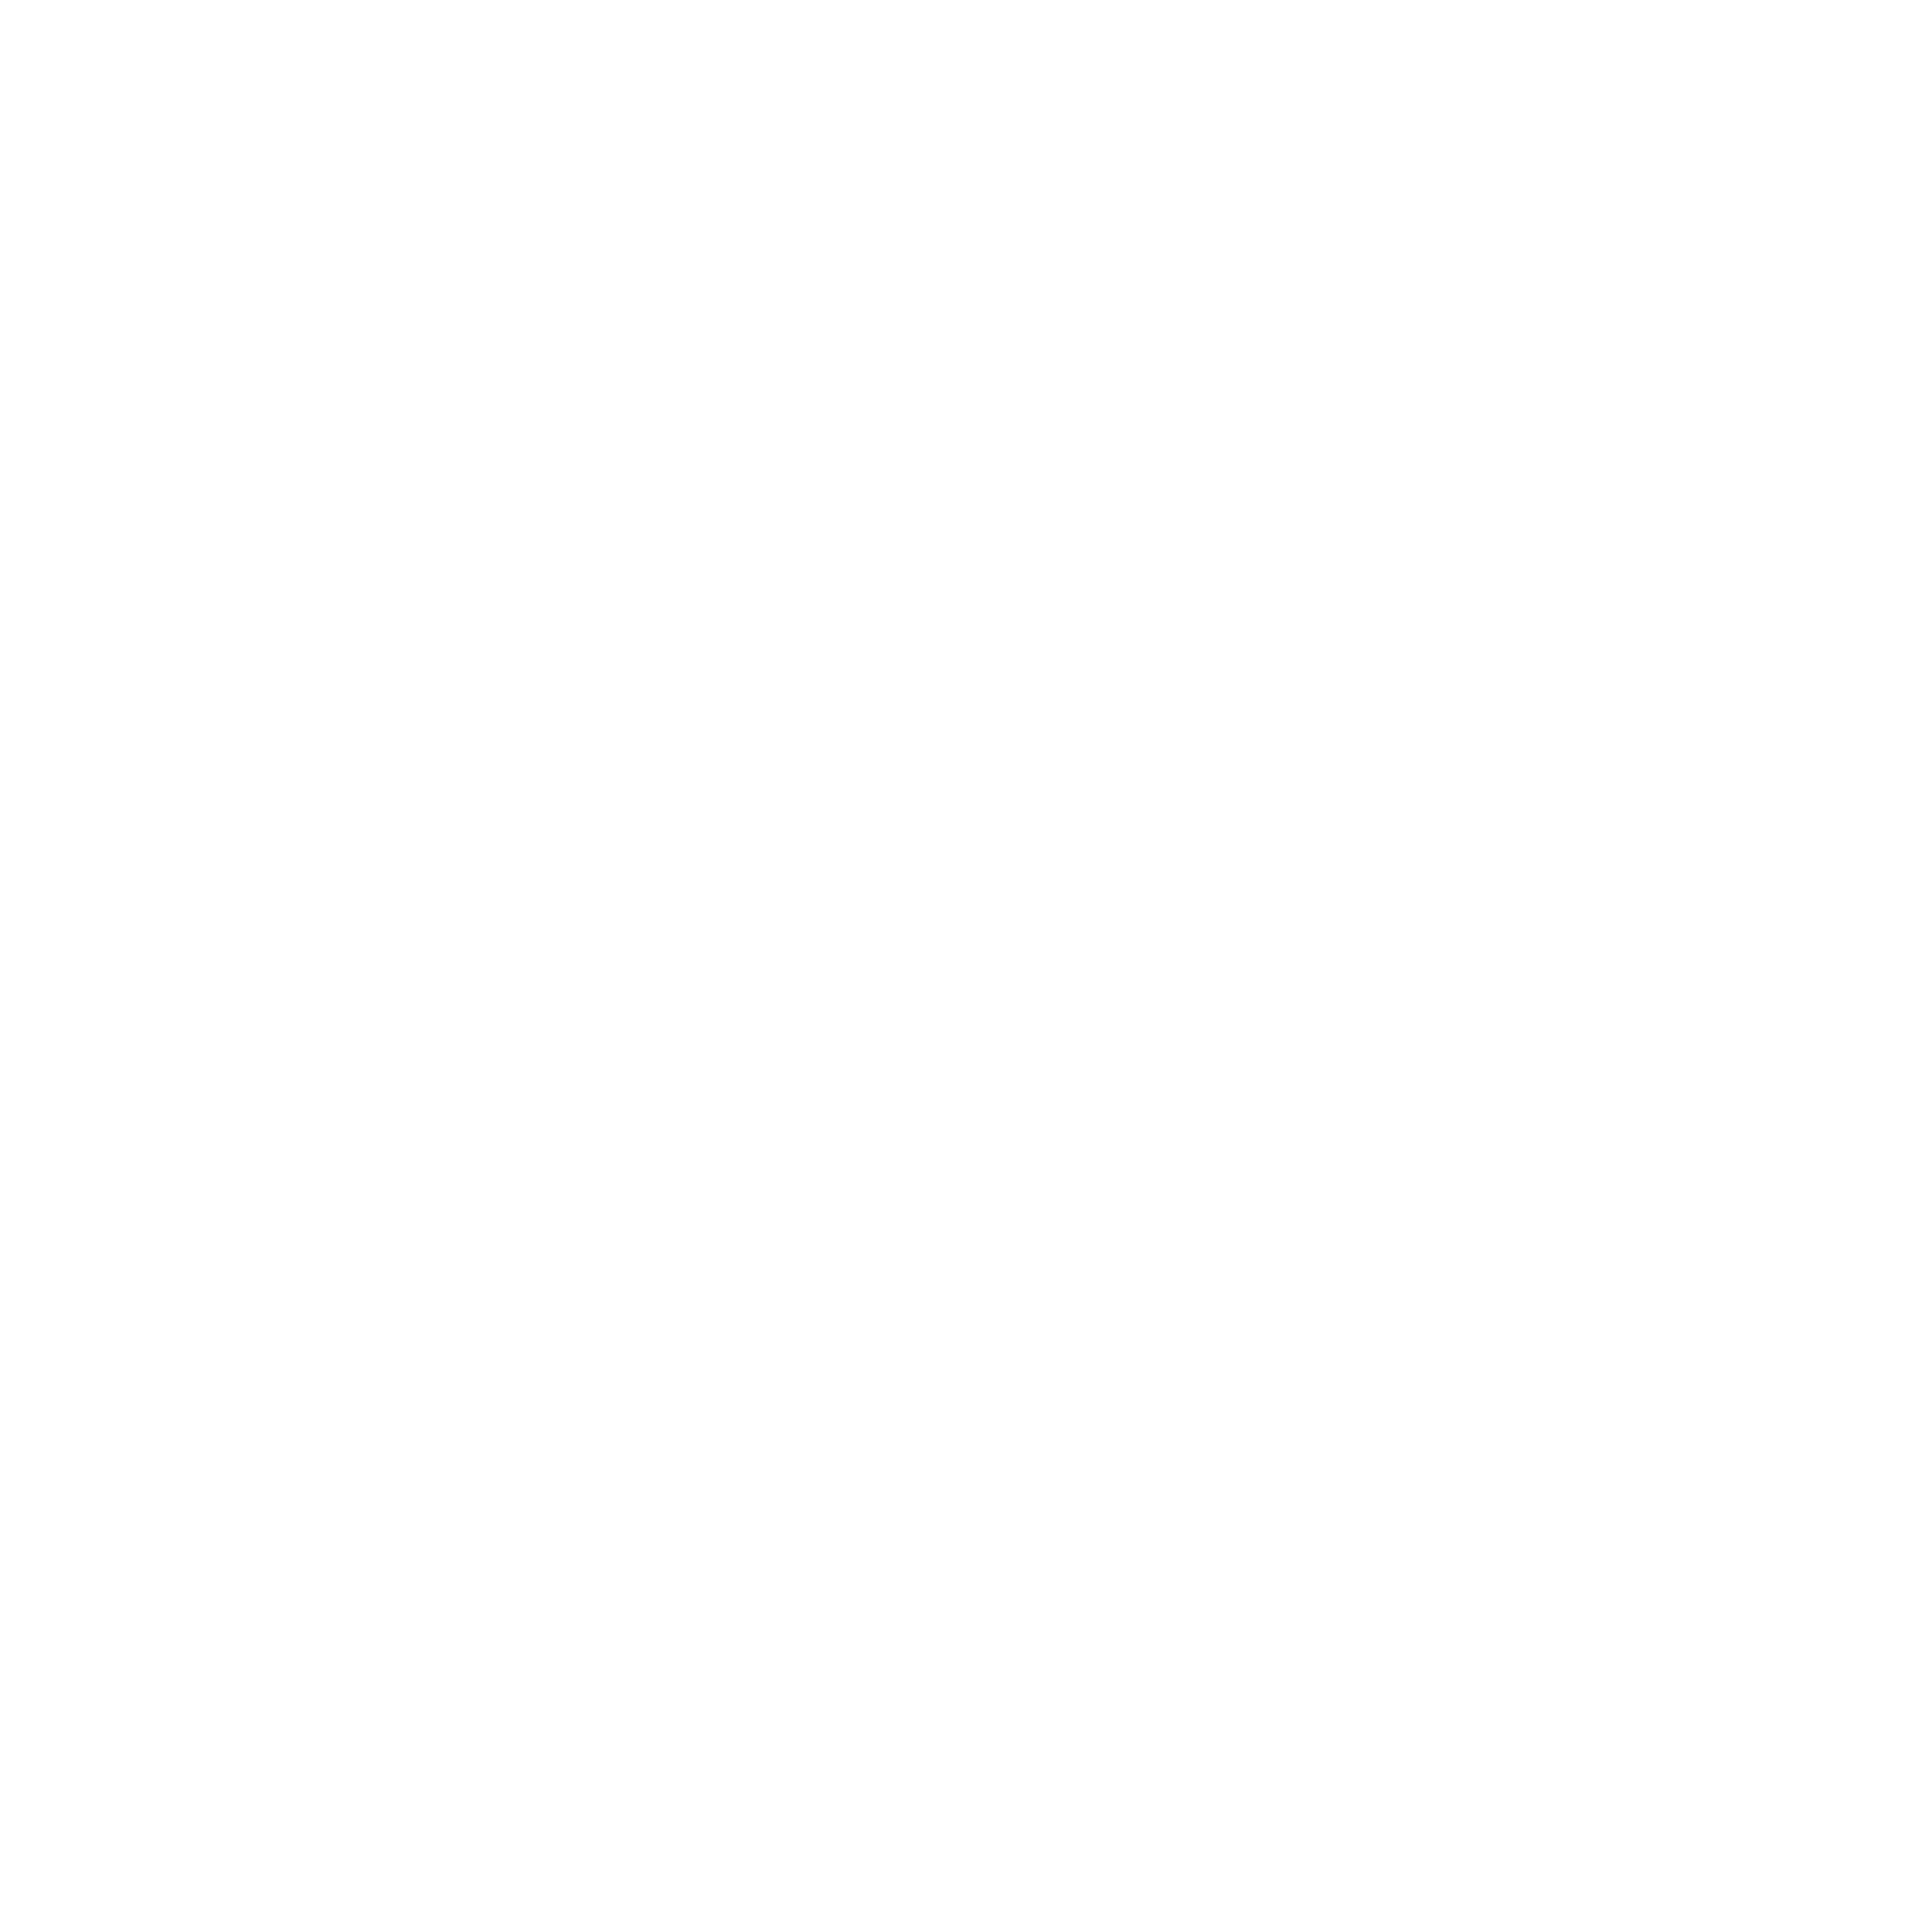

17:03 bilby WARNING : Axis limits cannot be NaN or Inf
17:03 bilby WARNING : Failed to create dynesty run plot at checkpoint


<IPython.core.display.Javascript object>


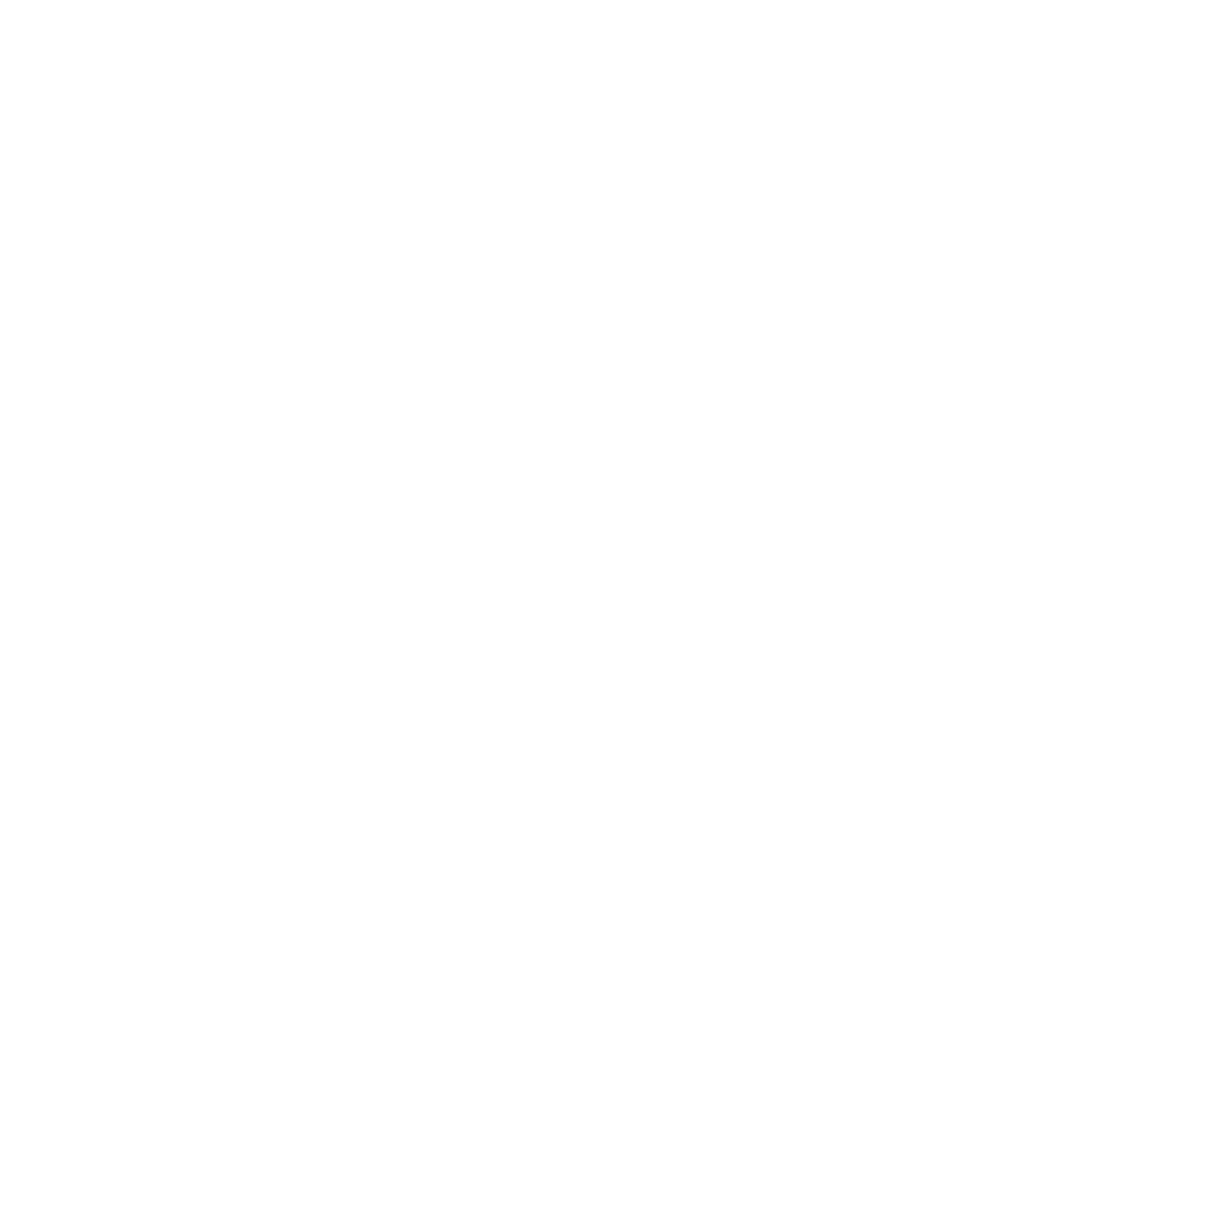

/home/akulkarn/.conda/envs/py3/lib/python3.8/site-packages/dynesty/utils.py:171: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.zeros(nsamples, dtype=np.int)
17:03 bilby INFO    : Sampling time: 0:01:57.141263
17:03 bilby INFO    : Summary of results:
nsamples: 5836
ln_noise_evidence:    nan
ln_evidence: 1044.796 +/-  0.383
ln_bayes_factor:    nan +/-  0.383



<IPython.core.display.Javascript object>


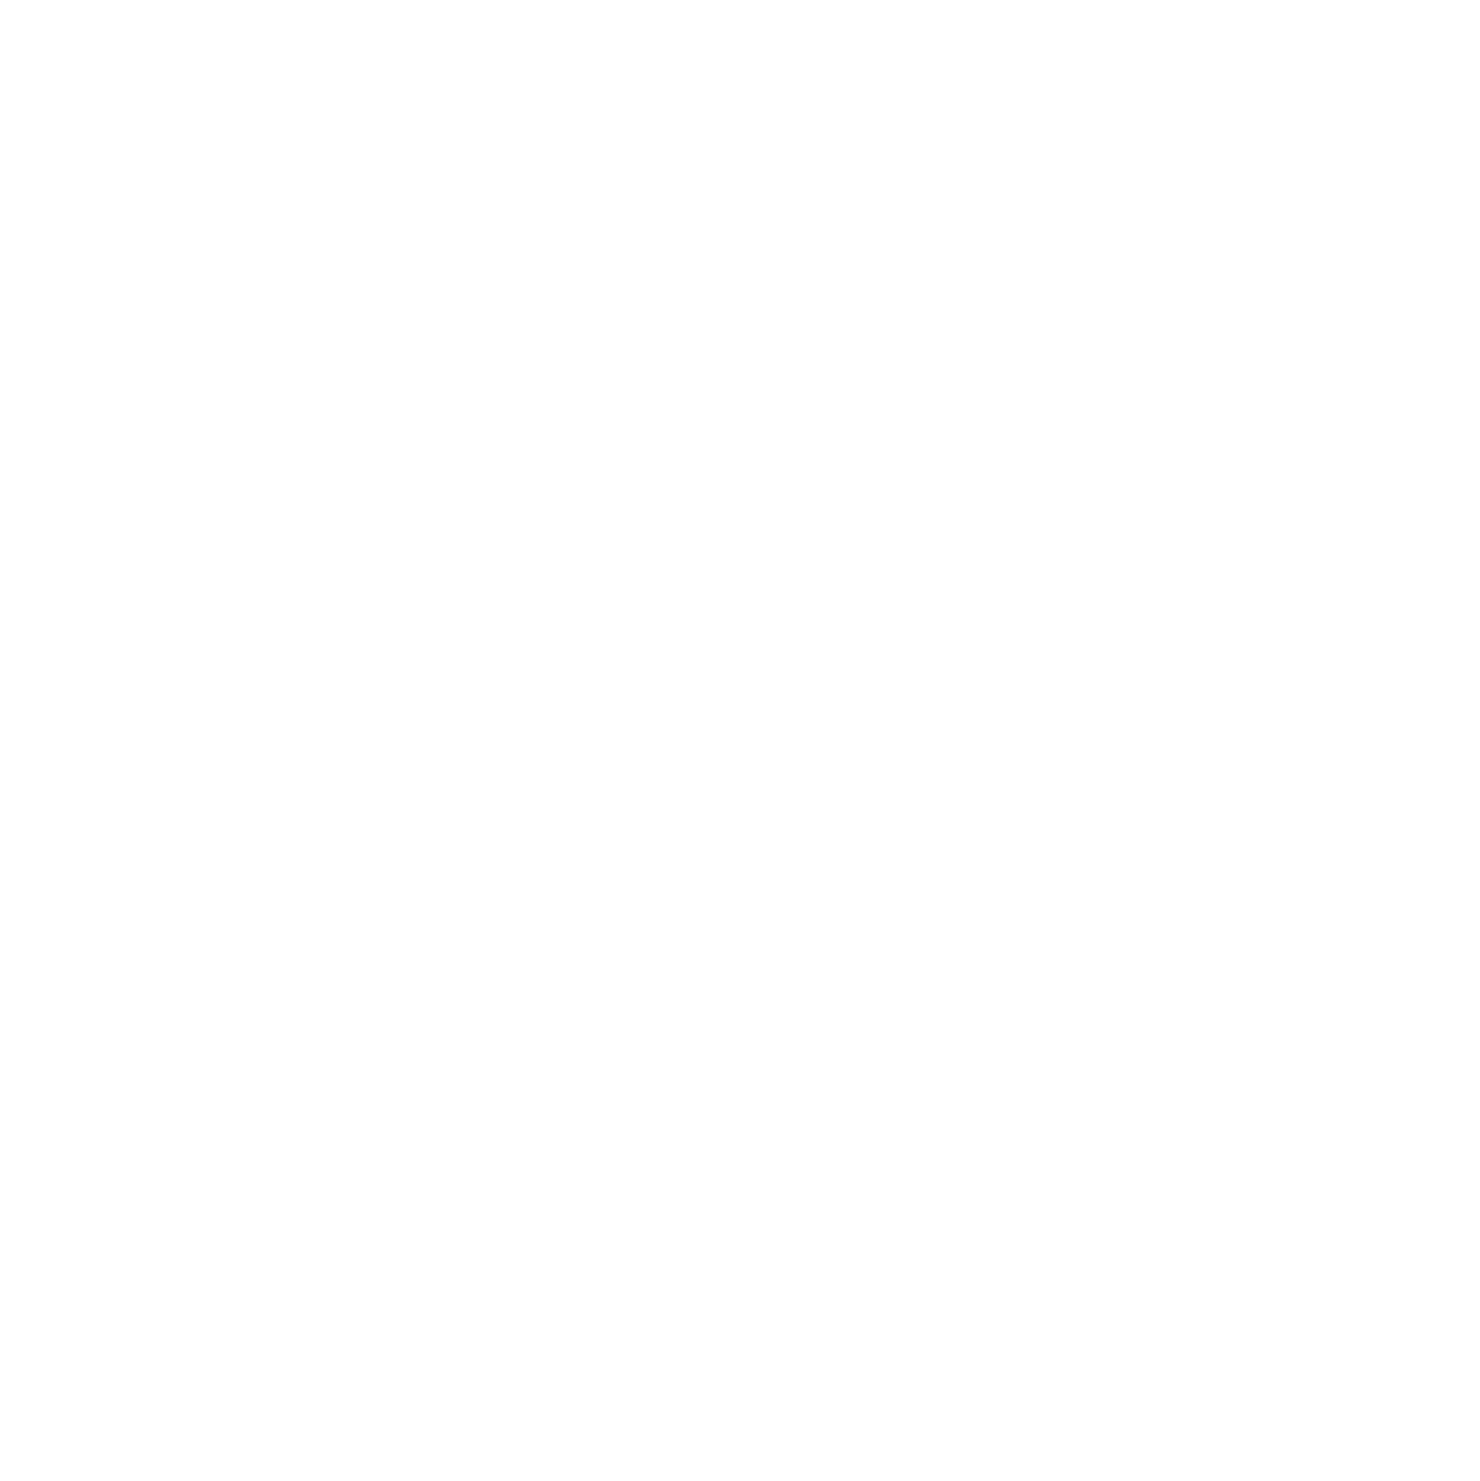

<IPython.core.display.Javascript object>


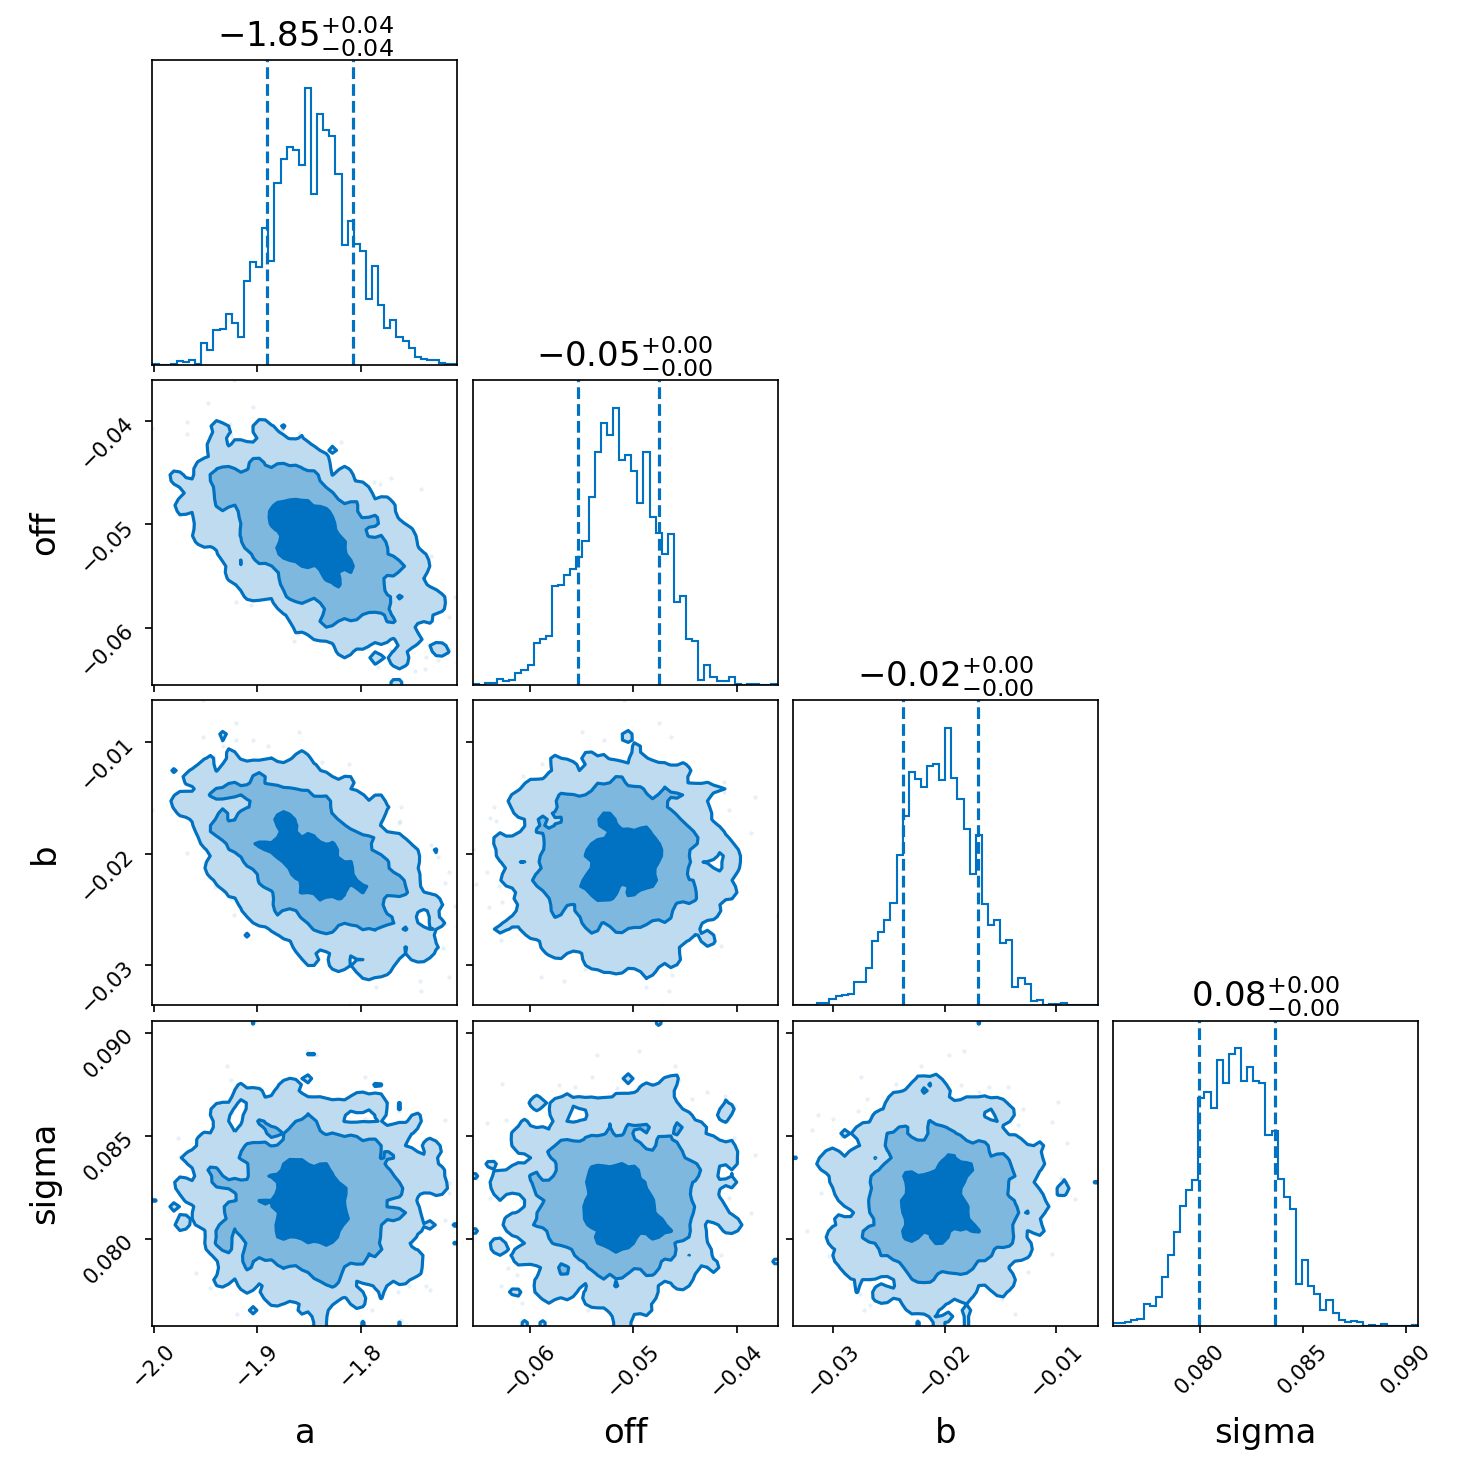

In [74]:

outdir=os.path.join('/home/akulkarn/notebooks/bilby_result_CovarPara_fit/', telescope)

likelihood=bilby.likelihood.GaussianLikelihood(freq_axis_sorted,corr_axis_sorted,fit_parabola)
priors=dict()
priors["a"]=bilby.core.prior.Uniform(-10,0,"a")
priors["b"]=bilby.core.prior.Uniform(-1,1,"b")
priors["sigma"]=bilby.core.prior.Uniform(0,1,"sigma")

result_blb = bilby.run_sampler(
        likelihood=likelihood,
        priors=priors,
        sampler="dynesty",
        nlive=250,
        outdir=outdir,
        clean=True
    )
result_blb.plot_corner()

## Does the covariance arcs has any dependece on the S/N of pulses? 
i.e. Does the curvature of arcs depend on the the S/N of the pulses?

##### Gettiing the Covariance matrix from only strong Pulses

In this, we would like to check if there is any dependence of the de-correlation on the S/N of the pulses. To do this, we forst estimate the S/N of the pulses using relation
$$ S/N = \frac{\sum_{i=1}^{N_{window}} (A_{i} -B)}{\sqrt{N_{window}}\sigma_{off}}  $$

on the Fscrunched data, and then we make a list of single pulses which are above a certain threshold in S/N. Further we produce 16/32 pulse integrated data from these selected single pulses, then after generating time of arrivals we fit for DM on the entire data and then produce post fit residuals. Finally we produe the jitter covariance matrix of the strong pulses.

In [28]:
#### Import these functions from the functions.py file

def subtract_baseline(datain):
    dim=datain.shape
    dataout=np.ndarray(dim)
    for subint in range(dim[0]):
        for pol in range(dim[1]):
            for freq in range(dim[2]):
                dataout[subint,pol,freq,:]=datain[subint,pol,freq,:]-np.mean(datain[subint,pol,freq,0:100])
    return dataout

def get_energies(datain,low,high):
    dim=datain.shape
    Ener_main_comp=np.ndarray([dim[0],dim[1],dim[2]])
    
    for subint in range(dim[0]):
        for pol in range(dim[1]):
            for freq in range(dim[2]):
                #mu=np.mean(datain[:,0,freq,0:100])
                #sig=np.std(datain[:,0,freq,0:100])
                Ener_main_comp[subint,pol,freq]=np.divide(np.sum(datain[subint,pol,freq,low:high]-np.mean(datain[subint,pol,freq,0:100])),np.multiply(np.sqrt(high-low),np.std(datain[subint,pol,freq,0:100])))
                #Ener_main_comp[subint,pol,freq]=np.divide(np.sum(datain[subint,0,freq,low:high]-mu),np.multiply(np.sqrt(high-low),sig))
    return Ener_main_comp

In [39]:
os.chdir("/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/Frequency_Appended_all_withK/Corrected_DM/SinglePulses_grouped")
list_strong_pulses=[]
list_weak_pulses=[]

<IPython.core.display.Javascript object>


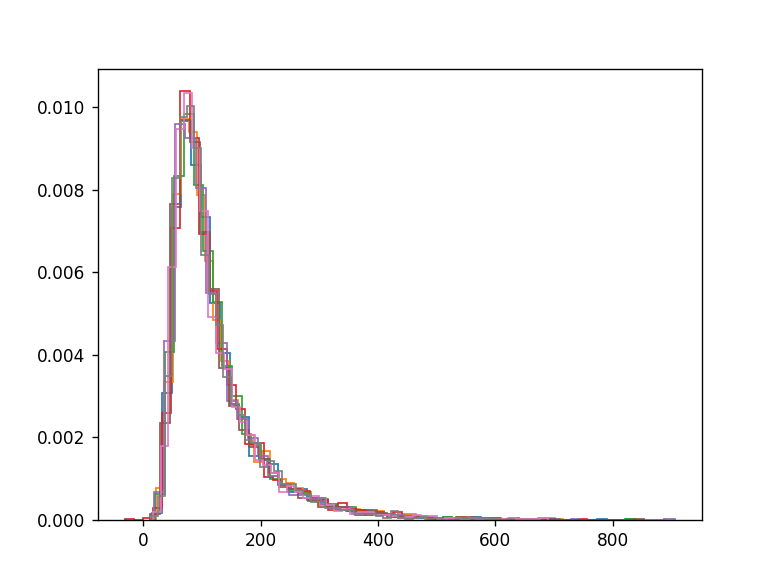

In [40]:
plt.figure()

for i in np.arange(0,8):
    archive_name='Batch_' + str(i+1) + '.ar'
    file_name='list_' + str(i+1) + '_pulses.txt'
    file_list=open(file_name).readlines()
    ar=psr.Archive_load(archive_name)
    ar.dedisperse()
    ar.pscrunch()
    ar.fscrunch()
    ar.centre_max_bin()
    data=ar.get_data()
    data=subtract_baseline(data)
    Energy_main_comp=get_energies(data,490,530)
    
    for j in range(Energy_main_comp.shape[0]):
        if Energy_main_comp[j,0,0] > 50:
            list_strong_pulses.append(file_list[j].strip('\n'))
        else:
            list_weak_pulses.append(file_list[j].strip('\n'))
    
    plt.hist(Energy_main_comp[:,0,0],bins=50,histtype='step',density=True)
    

In [41]:
print(len(list_strong_pulses))
print(len(list_weak_pulses))        

37510
2490


In [37]:
list_weak_pulses[0:6]

['pulse_8984615457_Lband.paz.XP.f32',
 'pulse_8984615464_Lband.paz.XP.f32',
 'pulse_8984615484_Lband.paz.XP.f32',
 'pulse_8984615497_Lband.paz.XP.f32',
 'pulse_8984615532_Lband.paz.XP.f32',
 'pulse_8984615548_Lband.paz.XP.f32']

In [42]:
list_strong_pulses_n = ["{}\n".format(i) for i in list_strong_pulses]
list_weak_pulses_n = ["{}\n".format(i) for i in list_weak_pulses]

# with open(r'/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/SinglePulses_all_withK/list_strong_pulses_300.txt', 'w') as fp:
#     fp.writelines(list_strong_pulses_n)
    
with open(r'/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/SinglePulses_all_withK/list_weak_pulses_50.txt', 'w') as fp:
    fp.writelines(list_weak_pulses_n)

In [11]:
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/timFiles')
Total_chn=27

<IPython.core.display.Javascript object>


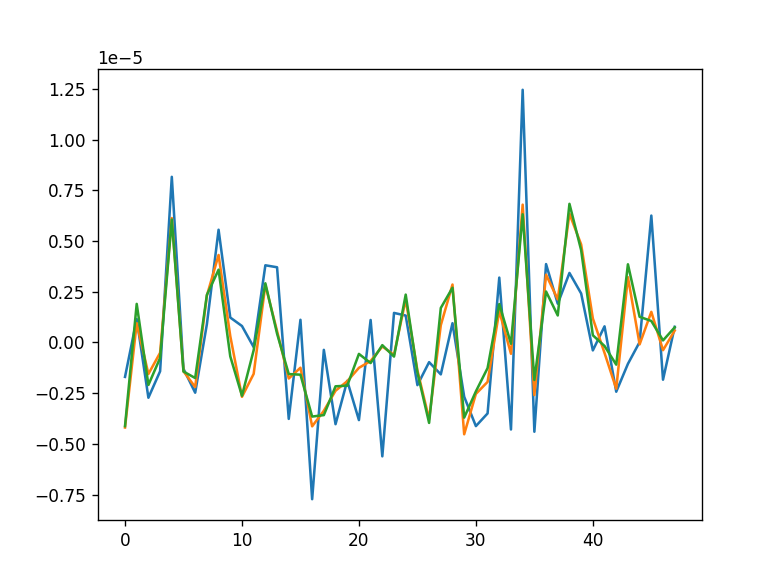

In [23]:
plt.figure()

for chn in [2,20,25]:#range(2):
    plt.plot(residuals_SingleP_Entire[0:300,chn])

In [12]:
#residuals_SingleP_Entire = np.loadtxt('res_All_pulses_1000.txt')  # Read post fit residuals_SingleP_Entire from a file into a numpy array.
residuals_SingleP_Entire_data = np.genfromtxt('PostRes_32p_Strong_300.txt')  ##MeerKAT
#residuals_SingleP_Entire_data = np.genfromtxt('PostRes_64pulint_Entire_SelChn_all.txt')
residuals_SingleP_Entire_data = residuals_SingleP_Entire_data.reshape((-1,Total_chn,4))  ## Getting residuals_SingleP_Entire in a matrix [subint,freq]

residuals_SingleP_Entire=residuals_SingleP_Entire_data[:,:,2]
Freq_SingleP_Entire=np.mean(residuals_SingleP_Entire_data[:,:,1],axis=0)

#### Running bootstrap on residuals_SingleP_Entire to generate samples
with NumpyRNGContext(1):   
    bootresult_SingleP_Entire = ast.bootstrap(residuals_SingleP_Entire, 500)
    
############### Pearson's Correlation Coefficient #################

### Create a mar=trix to store correlation coefficient for each sample of residuals
R_SingleP_Entire=np.ndarray([bootresult_SingleP_Entire.shape[0],bootresult_SingleP_Entire.shape[2],bootresult_SingleP_Entire.shape[2]])

## Calculate pearson Correlation coefficient for all samples
for i in range(bootresult_SingleP_Entire.shape[0]):
    R_SingleP_Entire[i,:,:]=np.corrcoef(bootresult_SingleP_Entire[i,:,:],rowvar=False)
    
################### Spearman Correlation coefficient ##########
R_SingleP_Entire_spr=np.ndarray([bootresult_SingleP_Entire.shape[0],bootresult_SingleP_Entire.shape[2],bootresult_SingleP_Entire.shape[2]])
R_SingleP_Entire_spr_pval=np.ndarray([bootresult_SingleP_Entire.shape[0],bootresult_SingleP_Entire.shape[2],bootresult_SingleP_Entire.shape[2]])

for i in range(bootresult_SingleP_Entire.shape[0]):
    R_SingleP_Entire_spr[i,:,:]=scs.spearmanr(bootresult_SingleP_Entire[i,:,:],axis=0)[0]
    R_SingleP_Entire_spr_pval[i,:,:]=scs.spearmanr(bootresult_SingleP_Entire[i,:,:],axis=0)[1]

In [43]:
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/timFiles')
Total_chn=27

In [44]:
#residuals_SingleWeakP_Entire = np.loadtxt('res_All_pulses_1000.txt')  # Read post fit residuals_SingleWeakP_Entire from a file into a numpy array.
residuals_SingleWeakP_Entire_data = np.genfromtxt('PostRes_32p_Weak_50.txt')  ##MeerKAT
#residuals_SingleWeakP_Entire_data = np.genfromtxt('PostRes_64pulint_Entire_SelChn_all.txt')
residuals_SingleWeakP_Entire_data = residuals_SingleWeakP_Entire_data.reshape((-1,Total_chn,4))  ## Getting residuals_SingleWeakP_Entire in a matrix [subint,freq]

residuals_SingleWeakP_Entire=residuals_SingleWeakP_Entire_data[:,:,2]
Freq_SingleWeakP_Entire=np.mean(residuals_SingleWeakP_Entire_data[:,:,1],axis=0)

#### Running bootstrap on residuals_SingleWeakP_Entire to generate samples
with NumpyRNGContext(1):   
    bootresult_SingleWeakP_Entire = ast.bootstrap(residuals_SingleWeakP_Entire, 500)
    
############### Pearson's Correlation Coefficient #################

### Create a mar=trix to store correlation coefficient for each sample of residuals
R_SingleWeakP_Entire=np.ndarray([bootresult_SingleWeakP_Entire.shape[0],bootresult_SingleWeakP_Entire.shape[2],bootresult_SingleWeakP_Entire.shape[2]])

## Calculate pearson Correlation coefficient for all samples
for i in range(bootresult_SingleWeakP_Entire.shape[0]):
    R_SingleWeakP_Entire[i,:,:]=np.corrcoef(bootresult_SingleWeakP_Entire[i,:,:],rowvar=False)
    
################### Spearman Correlation coefficient ##########
R_SingleWeakP_Entire_spr=np.ndarray([bootresult_SingleWeakP_Entire.shape[0],bootresult_SingleWeakP_Entire.shape[2],bootresult_SingleWeakP_Entire.shape[2]])
R_SingleWeakP_Entire_spr_pval=np.ndarray([bootresult_SingleWeakP_Entire.shape[0],bootresult_SingleWeakP_Entire.shape[2],bootresult_SingleWeakP_Entire.shape[2]])

for i in range(bootresult_SingleWeakP_Entire.shape[0]):
    R_SingleWeakP_Entire_spr[i,:,:]=scs.spearmanr(bootresult_SingleWeakP_Entire[i,:,:],axis=0)[0]
    R_SingleWeakP_Entire_spr_pval[i,:,:]=scs.spearmanr(bootresult_SingleWeakP_Entire[i,:,:],axis=0)[1]

<IPython.core.display.Javascript object>


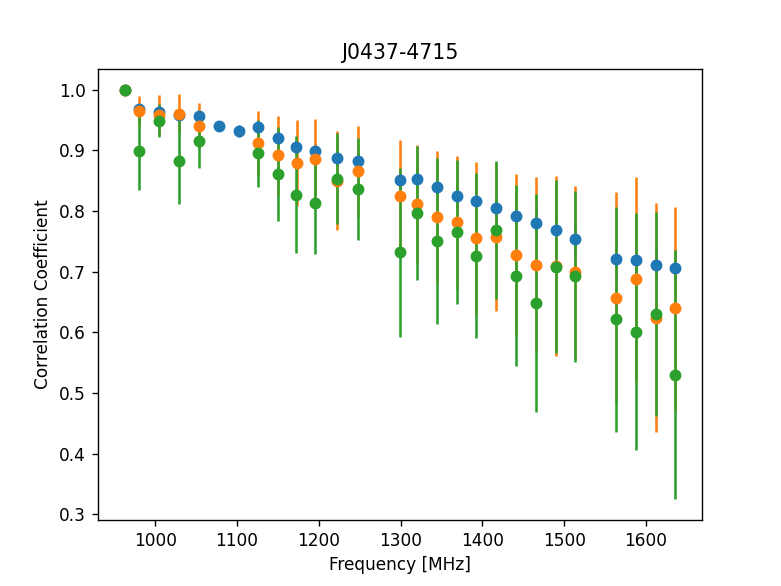

Text(0.5, 0, 'Frequency [MHz]')

In [45]:
plt.figure()#figsize=(8,3))
chn=1
plt.errorbar(Freq_32p_Entire[1:-1],np.mean(R_32p_Entire_spr[:,chn,1:-1],axis=0),yerr=1.96*np.std(R_32p_Entire_spr[:,chn,1:-1],axis=0),fmt='o')
plt.errorbar(Freq_SingleP_Entire[1:-1],np.mean(R_SingleP_Entire_spr[:,chn,1:-1],axis=0),yerr=1.96*np.std(R_SingleP_Entire_spr[:,chn,1:-1],axis=0),fmt='o')
plt.errorbar(Freq_SingleWeakP_Entire[1:-1],np.mean(R_SingleWeakP_Entire_spr[:,chn,1:-1],axis=0),yerr=1.96*np.std(R_SingleWeakP_Entire_spr[:,chn,1:-1],axis=0),fmt='o')
#plt.errorbar(Freq_SingleP_Entire[1:-1],np.mean(R_SingleP_Entire_spr[:,chn+5,1:-1],axis=0),yerr=1.96*np.std(R_SingleP_Entire_spr[:,chn+5,1:-1],axis=0),fmt='o')
#plt.errorbar(Freq_SingleP_Entire,np.mean(CorCoef_SingleP_Entire[:,chn,:],axis=0),fmt='o')#yerr=1.96*np.std(CorCoef_SingleP_Entire[:,chn,:],axis=0),fmt='o')
plt.ylabel("Correlation Coefficient")
plt.title("J0437-4715")
plt.xlabel('Frequency [MHz]')

Comparing the covariance matrix obtained from strong pulses and all pulses.

<IPython.core.display.Javascript object>


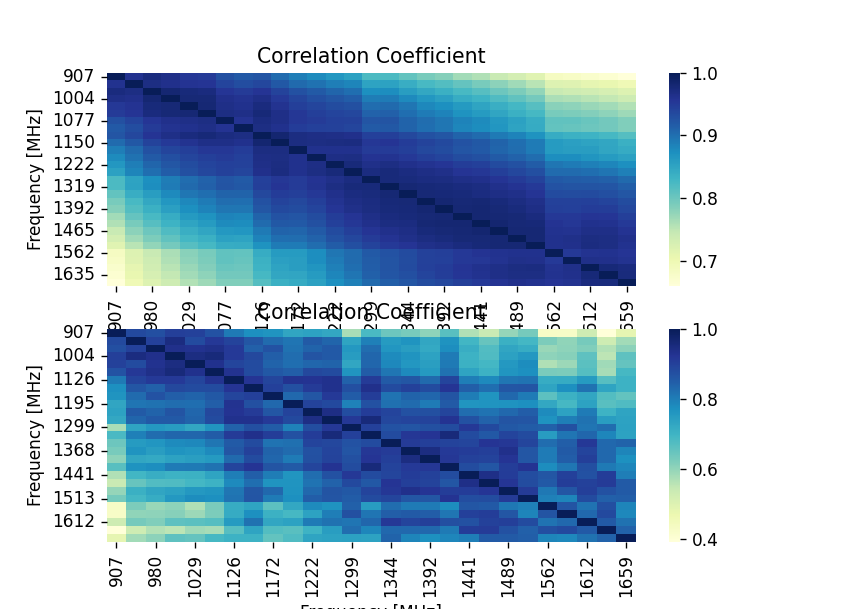

Text(0.5, 1.0, 'Correlation Coefficient')

In [46]:

df=pd.DataFrame(data=np.mean(R_32p_Entire_spr,axis=0),
               index=[int(Freq_32p_Entire[i]) for i in range(Freq_32p_Entire.shape[0])],
               columns=[int(Freq_32p_Entire[i]) for i in range(Freq_32p_Entire.shape[0])])
Fig, Ax = plt.subplots(2,1,figsize=(7,5))
sns.heatmap(df,ax=Ax[0],xticklabels=2,cmap='YlGnBu')
Ax[0].set_xlabel("Frequency [MHz]")
Ax[0].set_ylabel("Frequency [MHz]")
Ax[0].set_title('Correlation Coefficient')

df=pd.DataFrame(data=np.mean(R_SingleWeakP_Entire_spr,axis=0),
               index=[int(Freq_SingleP_Entire[i]) for i in range(Freq_SingleP_Entire.shape[0])],
               columns=[int(Freq_SingleP_Entire[i]) for i in range(Freq_SingleP_Entire.shape[0])])

sns.heatmap(df,ax=Ax[1],xticklabels=2,cmap='YlGnBu')
Ax[1].set_xlabel("Frequency [MHz]")
Ax[1].set_ylabel("Frequency [MHz]")
Ax[1].set_title('Correlation Coefficient')

In [ ]:
df=pd.DataFrame(data=np.mean(R_32p_Entire_spr,axis=0),
               index=[int(Freq_32p_Entire[i]) for i in range(Freq_32p_Entire.shape[0])],
               columns=[int(Freq_32p_Entire[i]) for i in range(Freq_32p_Entire.shape[0])])
Fig, Ax = plt.subplots(figsize=(7,5))
sns.heatmap(df,ax=Ax[0],xticklabels=2,cmap='YlGnBu')
Ax[0].set_xlabel("Frequency [MHz]")
Ax[0].set_ylabel("Frequency [MHz]")
Ax[0].set_title('Correlation Coefficient')

##### Does the mean of residuals (i.e. jitter induced residuals) show any frequency dependence?

<IPython.core.display.Javascript object>


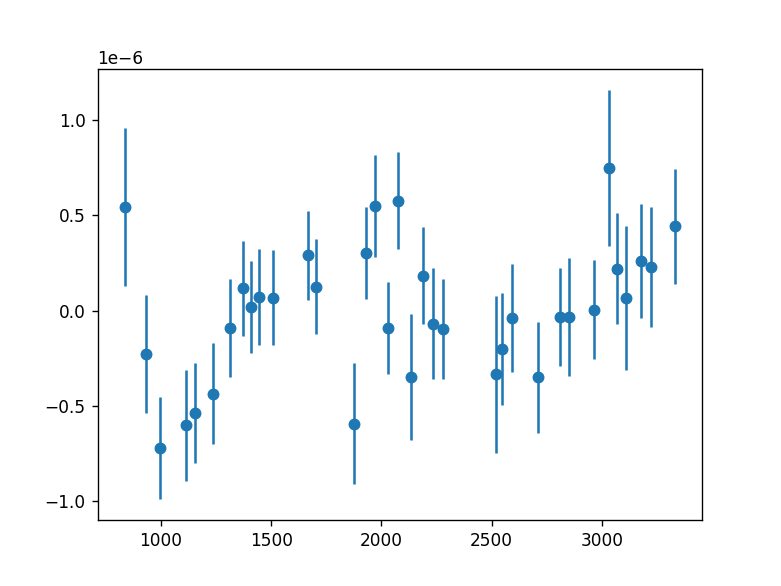

<ErrorbarContainer object of 3 artists>

In [31]:
res_mean_pks=np.mean(residuals_32p_SysNoise_Entire[:,:],axis=0)
res_mean_err_pks=np.std(residuals_32p_SysNoise_Entire[:,:],axis=0)/np.sqrt(residuals_32p_SysNoise_Entire.shape[0])
Freq_32p_Entire_pks=Freq_32p_SysNoise_Entire
plt.figure()
plt.errorbar(Freq_32p_Entire,res_mean,yerr=res_mean_err,fmt='o')

In [29]:
res_mean_mk=np.mean(residuals_32p_SysNoise_Entire[:,:],axis=0)
res_mean_err_mk=np.std(residuals_32p_SysNoise_Entire[:,:],axis=0)/np.sqrt(residuals_32p_SysNoise_Entire.shape[0])
Freq_32p_Entire_mk=Freq_32p_SysNoise_Entire


<IPython.core.display.Javascript object>


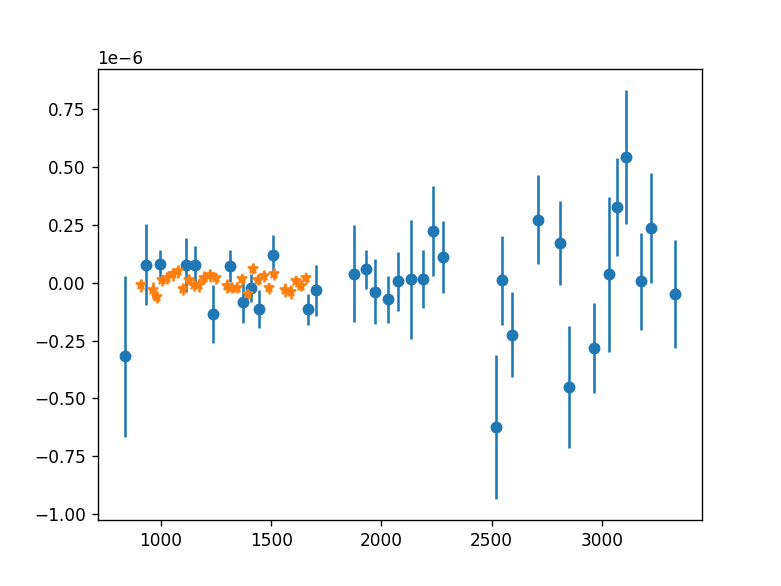

<ErrorbarContainer object of 3 artists>

In [32]:
plt.figure()
plt.errorbar(Freq_32p_Entire_pks,res_mean_pks,yerr=res_mean_err_pks,fmt='o')
plt.errorbar(Freq_32p_Entire_mk,res_mean_mk,yerr=res_mean_err_mk,fmt='*')